In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [38]:
time = np.array([ -0.262096774193544, 0.0, 0.0, 0.0, 0.0, 0.0, -0.262096774193544, -0.524193548387096, -0.524193548387096, -0.524193548387096, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.0, 0.0, -0.262096774193544, -0.524193548387096, -0.524193548387096, -0.524193548387096, -0.524193548387096, -0.524193548387096, -0.262096774193544, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.262096774193551, 1.04838709677419, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.524193548387099, 0.524193548387099, 0.524193548387099, 0.786290322580644, 0.786290322580644, 0.786290322580644, 0.786290322580644, 0.786290322580644, 1.31048387096774, 1.31048387096774, 0.786290322580644, 0.786290322580644, 1.04838709677419, 1.57258064516129, 1.57258064516129, 1.57258064516129, 1.57258064516129, 2.09677419354839, 2.09677419354839, 2.09677419354839, 1.83467741935483, 1.83467741935483, 1.83467741935483, 1.83467741935483, 1.83467741935483, 1.83467741935483, 1.83467741935483, 1.83467741935483, 1.83467741935483, 1.57258064516129, 1.57258064516129, 1.57258064516129, 1.31048387096774, 0.524193548387099, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.262096774193551, 0.524193548387099, 0.524193548387099, -0.262096774193544, -0.262096774193544, -0.262096774193544, 0.786290322580644, 0.786290322580644, 0.786290322580644, 0.786290322580644, 0.786290322580644, 0.786290322580644, 1.04838709677419, 1.31048387096774, 1.57258064516129, 1.57258064516129, 1.57258064516129, 1.57258064516129, 1.83467741935483, 2.35887096774193, 2.62096774193548, 2.35887096774193, 2.09677419354839, 1.57258064516129, 2.35887096774193, 2.88306451612903, 3.40725806451613, 3.40725806451613, 2.62096774193548, 2.62096774193548, 3.14516129032258, 3.40725806451613, 3.40725806451613, 3.66935483870967, 3.66935483870967, 3.66935483870967, 3.66935483870967, 3.66935483870967, 3.66935483870967, 3.66935483870967, 2.88306451612903, 2.88306451612903, 3.14516129032258, 3.66935483870967, 3.93145161290322, 3.93145161290322, 4.19354838709677, 4.45564516129032, 4.19354838709677, 2.35887096774193, 2.35887096774193, 2.62096774193548, 3.14516129032258, 3.14516129032258, 3.14516129032258, 3.14516129032258, 3.14516129032258, 3.14516129032258, 3.14516129032258, 3.40725806451613, 3.40725806451613, 3.66935483870967, 3.93145161290322, 4.45564516129032, 4.45564516129032, 4.45564516129032, 4.19354838709677, 3.93145161290322, 3.93145161290322, 4.97983870967742, 5.24193548387097, 5.24193548387097, 5.24193548387097, 6.02822580645161, 6.02822580645161, 5.24193548387097, 6.02822580645161, 5.76612903225806, 5.76612903225806, 5.76612903225806, 6.02822580645161, 6.29032258064516, 7.0766129032258, 6.29032258064516, 6.55241935483871, 6.02822580645161, 6.02822580645161, 5.76612903225806, 4.71774193548387, 4.71774193548387, 4.19354838709677, 4.19354838709677, 4.19354838709677, 4.71774193548387, 4.97983870967742, 5.24193548387097, 5.24193548387097, 5.24193548387097, 5.76612903225806, 5.76612903225806, 6.55241935483871, 6.29032258064516, 6.02822580645161, 6.02822580645161, 6.02822580645161, 6.55241935483871, 7.33870967741935, 7.33870967741935, 7.33870967741935, 6.55241935483871, 6.02822580645161, 5.50403225806451, 5.50403225806451, 5.50403225806451, 5.50403225806451, 6.55241935483871, 7.6008064516129, 7.6008064516129, 7.33870967741935, 6.81451612903226, 6.55241935483871, 6.55241935483871, 6.55241935483871, 6.29032258064516, 6.29032258064516, 6.29032258064516, 6.81451612903226, 7.0766129032258, 7.0766129032258, 8.125, 8.125, 8.6491935483871, 8.6491935483871, 8.6491935483871, 9.43548387096774, 9.43548387096774, 8.6491935483871, 7.6008064516129, 7.86290322580645, 8.91129032258064, 9.17338709677419, 8.91129032258064, 8.91129032258064, 8.91129032258064, 9.43548387096774, 9.95967741935484, 9.95967741935484, 9.95967741935484, 9.69758064516129, 10.2217741935483, 10.7459677419354, 11.008064516129, 10.4838709677419, 10.4838709677419, 10.4838709677419, 9.95967741935484, 9.17338709677419, 8.6491935483871, 8.125, 8.125, 8.38709677419354, 8.38709677419354, 8.38709677419354, 8.91129032258064, 8.91129032258064, 9.69758064516129, 11.008064516129, 9.95967741935484, 8.6491935483871, 9.69758064516129, 9.43548387096774, 9.69758064516129, 9.95967741935484, 9.95967741935484, 9.95967741935484, 6.29032258064516, 5.76612903225806, 9.43548387096774, 10.2217741935483, 10.2217741935483, 10.7459677419354, 11.008064516129, 10.4838709677419, 10.2217741935483, 9.95967741935484, 9.69758064516129, 9.43548387096774, 9.43548387096774, 9.43548387096774, 9.69758064516129, 9.69758064516129, 9.69758064516129, 9.95967741935484, 10.7459677419354, 12.0564516129032, 13.1048387096774, 13.1048387096774, 11.5322580645161, 12.8427419354838, 12.8427419354838, 12.8427419354838, 12.8427419354838, 11.7943548387096, 11.008064516129, 10.7459677419354, 10.4838709677419, 10.2217741935483, 10.2217741935483, 10.2217741935483, 9.95967741935484, 9.95967741935484, 10.7459677419354, 11.2701612903225, 12.5806451612903, 12.5806451612903, 12.5806451612903, 12.5806451612903, 12.3185483870967, 12.3185483870967, 12.3185483870967, 12.3185483870967, 12.3185483870967, 12.5806451612903, 12.5806451612903, 14.9395161290322, 14.9395161290322, 15.7258064516129, 16.5120967741935, 15.9879032258064, 15.4637096774193, 14.9395161290322, 14.9395161290322, 14.9395161290322, 14.4153225806451, 16.5120967741935, 15.7258064516129, 15.2016129032258, 14.9395161290322, 13.891129032258, 13.891129032258, 13.891129032258, 13.891129032258, 13.6290322580645, 12.8427419354838, 12.8427419354838, 12.8427419354838, 12.8427419354838, 14.4153225806451, 14.1532258064516, 13.6290322580645, 13.6290322580645, 13.6290322580645, 13.6290322580645, 15.4637096774193, 15.9879032258064, 16.7741935483871, 18.0846774193548, 17.8225806451612, 17.5604838709677, 17.2983870967741, 16.2499999999999, 19.3951612903225, 19.6572580645161, 19.133064516129, 18.6088709677419, 18.6088709677419, 18.6088709677419, 18.6088709677419, 18.8709677419354, 19.3951612903225, 9.95967741935484, 18.6088709677419, 19.6572580645161, 19.3951612903225, 19.3951612903225, 18.0846774193548, 18.0846774193548, 18.0846774193548, 17.8225806451612, 17.0362903225806, 15.9879032258064, 15.7258064516129, 15.2016129032258, 15.2016129032258, 15.2016129032258, 13.891129032258, 13.891129032258, 14.4153225806451, 14.1532258064516, 15.2016129032258, 15.2016129032258, 15.2016129032258, 15.2016129032258, 15.2016129032258, 15.2016129032258, 14.9395161290322, 14.4153225806451, 14.4153225806451, 14.1532258064516, 14.1532258064516, 14.6774193548387, 14.9395161290322, 15.4637096774193, 15.4637096774193, 15.4637096774193, 18.3467741935483, 17.5604838709677, 16.5120967741935, 15.9879032258064, 15.9879032258064, 15.9879032258064, 15.9879032258064, 16.2499999999999, 17.8225806451612, 19.6572580645161, 19.6572580645161, 19.3951612903225, 17.8225806451612, 17.5604838709677, 17.0362903225806, 17.0362903225806, 16.7741935483871, 15.2016129032258, 15.2016129032258, 17.8225806451612, 18.6088709677419, 19.3951612903225, 19.3951612903225, 19.6572580645161, 19.133064516129, 19.133064516129, 18.8709677419354, 18.8709677419354, 18.8709677419354, 20.4435483870967, 19.9193548387096, 19.9193548387096, 19.9193548387096, 19.9193548387096, 19.9193548387096, 19.9193548387096, 19.6572580645161, 19.6572580645161, 18.8709677419354, 18.6088709677419, 18.6088709677419, 18.3467741935483, 19.9193548387096, 19.6572580645161, 19.3951612903225, 18.8709677419354, 18.3467741935483, 17.8225806451612, 16.5120967741935, 16.5120967741935, 16.5120967741935, 12.8427419354838, 18.0846774193548, 18.3467741935483, 18.0846774193548, 20.1814516129032, 20.1814516129032, 20.1814516129032, 20.7056451612903, 20.7056451612903, 19.9193548387096, 20.9677419354838, 20.9677419354838, 21.2298387096774, 21.2298387096774, 20.9677419354838, 20.9677419354838, 20.9677419354838, 20.9677419354838, 21.2298387096774, 21.7540322580645, 21.7540322580645, 21.2298387096774, 21.2298387096774, 21.2298387096774, 21.2298387096774, 20.9677419354838, 20.7056451612903, 20.4435483870967, 20.4435483870967, 20.4435483870967, 21.2298387096774, 21.4919354838709, 22.016129032258, 22.016129032258, 22.2782258064516, 22.2782258064516, 22.5403225806451, 22.5403225806451, 22.5403225806451, 22.016129032258, 21.7540322580645, 21.7540322580645, 21.7540322580645, 21.7540322580645, 21.7540322580645, 22.016129032258, 22.2782258064516, 22.8024193548387, 22.8024193548387, 22.8024193548387, 23.0645161290322, 23.0645161290322, 23.0645161290322, 23.0645161290322, 23.0645161290322, 23.0645161290322, 23.5887096774193, 23.8508064516129, 24.375, 24.375, 24.1129032258064, 24.1129032258064, 24.1129032258064, 23.8508064516129, 23.3266129032258, 23.3266129032258, 23.5887096774193, 23.5887096774193, 23.5887096774193, 23.5887096774193, 23.3266129032258, 23.8508064516129, 23.8508064516129, 23.8508064516129, 24.1129032258064, 24.899193548387, 24.899193548387, 24.375, 23.3266129032258, 22.5403225806451, 22.5403225806451, 22.8024193548387, 23.3266129032258, 23.5887096774193, 23.3266129032258, 23.5887096774193, 23.8508064516129, 23.5887096774193, 23.5887096774193, 23.5887096774193, 25.1612903225806, 25.1612903225806, 25.1612903225806, 25.1612903225806, 25.1612903225806, 25.1612903225806, 24.899193548387, 24.1129032258064, 24.1129032258064, 24.375, 24.6370967741935, 25.4233870967741, 25.4233870967741, 25.6854838709677, 25.4233870967741, 25.4233870967741, 25.4233870967741, 25.6854838709677, 25.6854838709677, 25.9475806451612, 25.9475806451612, 26.2096774193548, 26.9959677419354, 26.7338709677419, 27.7822580645161, 26.2096774193548, 25.9475806451612, 25.9475806451612, 25.9475806451612, 26.2096774193548, 26.2096774193548, 25.9475806451612, 25.9475806451612, 25.9475806451612, 26.2096774193548, 26.4717741935483, 26.4717741935483, 26.4717741935483, 26.4717741935483, 24.375, 26.4717741935483, 28.3064516129032, 28.3064516129032, 28.3064516129032, 28.3064516129032, 28.0443548387096, 28.0443548387096, 27.7822580645161, 27.5201612903225, 27.5201612903225, 27.5201612903225, 27.7822580645161, 28.0443548387096, 28.0443548387096, 27.258064516129, 26.9959677419354, 26.7338709677419, 26.4717741935483, 26.4717741935483, 26.4717741935483, 26.7338709677419, 26.9959677419354, 27.258064516129, 27.7822580645161, 27.7822580645161, 27.258064516129, 26.7338709677419, 26.7338709677419, 28.0443548387096, 28.0443548387096, 28.0443548387096, 28.0443548387096, 28.8306451612903, 28.5685483870967, 28.3064516129032, 28.3064516129032, 27.7822580645161, 27.5201612903225, 27.5201612903225, 28.0443548387096, 28.0443548387096, 28.0443548387096, 28.3064516129032, 28.3064516129032, 28.3064516129032, 28.3064516129032, 28.3064516129032, 28.3064516129032, 28.8306451612903, 28.8306451612903, 29.0927419354838, 29.0927419354838, 29.0927419354838, 29.8790322580645, 29.8790322580645, 30.141129032258, 30.141129032258, 30.6653225806451, 30.6653225806451, 30.4032258064516, 29.8790322580645, 29.8790322580645, 29.8790322580645, 29.3548387096774, 29.3548387096774, 29.3548387096774, 29.3548387096774, 29.3548387096774, 29.6169354838709, 29.8790322580645, 30.141129032258, 30.6653225806451, 30.6653225806451, 30.6653225806451, 30.9274193548387, 31.1895161290322, 31.1895161290322, 30.9274193548387, 31.7137096774193, 31.9758064516129, 31.9758064516129, 31.9758064516129, 31.9758064516129, 31.7137096774193, 31.7137096774193, 31.4516129032258, 31.4516129032258, 31.1895161290322, 30.6653225806451, 31.1895161290322, 31.1895161290322, 31.4516129032258, 31.4516129032258, 31.4516129032258, 31.1895161290322, 31.1895161290322, 30.9274193548387, 30.9274193548387, 31.1895161290322, 31.4516129032258, 31.4516129032258, 31.7137096774193, 31.4516129032258, 30.4032258064516, 30.4032258064516, 30.4032258064516, 30.4032258064516, 30.141129032258, 30.141129032258, 30.141129032258, 27.5201612903225, 30.6653225806451, 32.2379032258064, 32.2379032258064, 32.2379032258064, 32.2379032258064, 32.2379032258064, 32.2379032258064, 32.2379032258064, 32.2379032258064, 32.5, 32.5, 32.7620967741935, 33.024193548387, 33.5483870967741, 33.5483870967741, 33.2862903225806, 33.2862903225806, 33.024193548387, 33.2862903225806, 33.2862903225806, 33.024193548387, 33.024193548387, 32.7620967741935, 33.024193548387, 33.024193548387, 32.5, 31.7137096774193, 32.7620967741935, 32.2379032258064, 32.2379032258064, 32.5, 32.5, 32.5, 32.7620967741935, 33.024193548387, 32.5, 32.2379032258064, 32.2379032258064, 33.2862903225806, 33.2862903225806, 34.0725806451612, 34.0725806451612, 34.0725806451612, 33.8104838709677, 33.5483870967741, 33.8104838709677, 35.1209677419354, 35.1209677419354, 34.5967741935483, 34.3346774193548, 33.8104838709677, 33.8104838709677, 33.5483870967741, 33.5483870967741, 34.5967741935483, 34.5967741935483, 34.8588709677419, 35.1209677419354, 35.383064516129, 35.6451612903225, 34.8588709677419, 34.8588709677419, 34.8588709677419, 34.8588709677419, 34.8588709677419, 35.383064516129, 35.1209677419354, 35.1209677419354, 35.1209677419354, 34.8588709677419, 34.8588709677419, 34.3346774193548, 34.0725806451612, 36.9556451612903, 36.9556451612903, 36.9556451612903, 36.9556451612903, 36.9556451612903, 36.9556451612903, 36.9556451612903, 36.9556451612903, 36.9556451612903, 36.9556451612903, 36.9556451612903, 36.9556451612903, 37.2177419354838, 37.7419354838709, 37.7419354838709, 37.4798387096774, 37.2177419354838, 36.9556451612903, 37.2177419354838, 37.2177419354838, 37.2177419354838, 37.2177419354838, 36.4314516129032, 35.6451612903225, 35.6451612903225, 35.6451612903225, 35.6451612903225, 35.6451612903225, 35.383064516129, 35.383064516129, 35.383064516129, 36.1693548387096, 36.4314516129032, 36.4314516129032, 34.5967741935483, 34.8588709677419, 35.6451612903225, 36.6935483870967, 37.4798387096774, 37.4798387096774, 37.4798387096774, 37.4798387096774, 37.4798387096774, 39.0524193548387, 39.0524193548387, 38.7903225806451, 38.7903225806451, 38.7903225806451, 38.5282258064516, 38.5282258064516, 38.266129032258, 38.266129032258, 37.7419354838709, 37.7419354838709, 37.7419354838709, 37.7419354838709, 37.4798387096774, 37.4798387096774, 37.4798387096774, 37.4798387096774, 37.4798387096774, 38.0040322580645, 38.0040322580645, 38.0040322580645, 37.4798387096774, 37.4798387096774, 37.4798387096774, 41.1491935483871, 41.1491935483871, 41.1491935483871, 41.1491935483871, 41.1491935483871, 40.8870967741935, 40.625, 40.625, 41.1491935483871, 40.625, 40.625, 40.625, 40.625, 40.3629032258064, 40.3629032258064, 40.3629032258064, 40.1008064516129, 39.8387096774193, 39.8387096774193, 39.8387096774193, 39.5766129032258, 39.3145161290322, 39.0524193548387, 39.0524193548387, 39.3145161290322, 39.0524193548387, 39.3145161290322, 39.3145161290322, 39.5766129032258, 39.8387096774193, 39.8387096774193, 39.8387096774193, 39.8387096774193, 39.8387096774193, 42.9838709677419, 42.7217741935483, 42.4596774193548, 42.4596774193548, 42.1975806451612, 42.4596774193548, 42.7217741935483, 42.1975806451612, 42.1975806451612, 42.1975806451612, 42.1975806451612, 42.1975806451612, 41.9354838709677, 41.9354838709677, 41.9354838709677, 41.9354838709677, 41.6733870967741, 41.6733870967741, 41.6733870967741, 41.9354838709677, 41.9354838709677, 41.9354838709677, 42.4596774193548, 42.4596774193548, 42.4596774193548, 42.4596774193548, 42.1975806451612, 41.9354838709677, 41.6733870967741, 41.4112903225806, 41.4112903225806, 41.4112903225806, 41.4112903225806, 41.4112903225806, 41.6733870967741, 41.6733870967741, 42.7217741935483, 42.7217741935483, 41.4112903225806, 46.391129032258, 46.6532258064516, 46.6532258064516, 46.6532258064516, 46.6532258064516, 46.6532258064516, 47.1774193548387, 47.1774193548387, 47.1774193548387, 46.9153225806451, 46.6532258064516, 46.1290322580645, 45.8669354838709, 45.3427419354838, 45.3427419354838, 45.0806451612903, 45.0806451612903, 44.8185483870967, 44.8185483870967, 45.3427419354838, 45.6048387096774, 44.2943548387096, 44.2943548387096, 44.2943548387096, 44.2943548387096, 44.2943548387096, 44.2943548387096, 43.7701612903225, 44.0322580645161, 44.0322580645161, 44.0322580645161, 44.0322580645161, 44.0322580645161, 44.0322580645161, 44.2943548387096, 44.2943548387096, 44.0322580645161, 44.0322580645161, 44.0322580645161, 44.2943548387096, 44.2943548387096, 44.2943548387096, 43.508064516129, 43.508064516129, 44.0322580645161, 44.0322580645161, 44.0322580645161, 44.0322580645161, 43.7701612903225, 43.508064516129, 42.9838709677419, 43.7701612903225, 46.1290322580645, 46.1290322580645, 45.8669354838709, 45.8669354838709, 45.8669354838709, 45.8669354838709, 45.8669354838709, 45.6048387096774, 45.0806451612903, 45.0806451612903, 45.0806451612903, 45.0806451612903, 45.3427419354838, 46.1290322580645, 46.1290322580645, 45.6048387096774, 45.6048387096774, 45.6048387096774, 45.6048387096774, 46.6532258064516, 45.8669354838709, 46.1290322580645, 47.1774193548387, 46.6532258064516, 46.6532258064516, 46.6532258064516, 46.6532258064516, 46.6532258064516, 46.391129032258, 46.391129032258, 46.1290322580645, 46.1290322580645, 46.1290322580645, 46.1290322580645, 49.0120967741935, 48.75, 47.7016129032257, 48.2258064516129, 50.0604838709677, 50.0604838709677, 50.0604838709677, 50.0604838709677, 50.0604838709677, 49.7983870967741, 49.274193548387, 49.0120967741935, 48.4879032258064, 48.2258064516129, 48.4879032258064, 48.4879032258064, 48.4879032258064, 48.4879032258064, 48.2258064516129, 47.9637096774193, 47.7016129032257, 47.7016129032257, 47.7016129032257, 48.4879032258064, 48.4879032258064, 48.2258064516129, 47.9637096774193, 47.9637096774193, 47.9637096774193, 47.7016129032257, 47.7016129032257, 46.391129032258, 46.391129032258, 47.1774193548387, 47.1774193548387, 47.9637096774193, 47.9637096774193, 47.9637096774193, 47.7016129032257, 46.9153225806451, 46.9153225806451, 50.5846774193548, 50.5846774193548, 50.8467741935483, 51.3709677419354, 51.3709677419354, 50.8467741935483, 50.8467741935483, 50.8467741935483, 50.8467741935483, 50.8467741935483, 50.5846774193548, 50.3225806451612, 50.3225806451612, 50.0604838709677, 50.0604838709677, 50.0604838709677, 50.0604838709677, 49.5362903225806, 48.75, 48.75, 48.75, 49.274193548387, 49.5362903225806, 49.274193548387, 49.0120967741935, 48.75, 48.2258064516129, 47.7016129032257, 47.7016129032257, 47.4395161290322, 48.2258064516129, 49.7983870967741, 50.0604838709677, 50.0604838709677, 50.0604838709677, 49.5362903225806, 49.5362903225806, 51.3709677419354, 50.8467741935483, 50.3225806451612, 50.8467741935483, 51.3709677419354, 52.1572580645161, 51.633064516129, 50.8467741935483, 50.5846774193548, 50.5846774193548, 50.5846774193548, 50.5846774193548, 50.5846774193548, 50.3225806451612, 49.7983870967741, 50.0604838709677, 50.3225806451612, 52.1572580645161, 51.3709677419354, 51.3709677419354, 52.1572580645161, 52.4193548387096, 52.6814516129032, 52.6814516129032, 52.9435483870967, 53.2056451612903, 53.2056451612903, 53.2056451612903, 53.2056451612903, 53.2056451612903, 53.2056451612903, 52.9435483870967, 52.9435483870967, 52.9435483870967, 52.9435483870967, 52.6814516129032, 51.8951612903225, 51.8951612903225, 52.1572580645161, 52.1572580645161, 54.7782258064516, 55.5645161290322, 55.5645161290322, 55.3024193548387, 55.0403225806451, 55.0403225806451, 55.0403225806451, 55.0403225806451, 55.0403225806451, 55.0403225806451, 55.0403225806451, 55.0403225806451, 54.7782258064516, 54.7782258064516, 54.7782258064516, 54.7782258064516, 54.7782258064516, 55.0403225806451, 55.0403225806451, 55.0403225806451, 55.0403225806451, 55.0403225806451, 55.0403225806451, 55.0403225806451, 55.0403225806451, 55.0403225806451, 54.7782258064516, 54.7782258064516, 54.7782258064516, 54.7782258064516, 54.2540322580645, 54.2540322580645, 54.516129032258, 54.516129032258, 54.7782258064516, 54.516129032258, 54.516129032258, 54.516129032258, 54.2540322580645, 54.2540322580645, 54.2540322580645, 54.2540322580645, 53.7298387096774, 53.7298387096774, 53.4677419354838, 52.9435483870967, 52.1572580645161, 51.8951612903225, 51.8951612903225, 52.6814516129032, 52.9435483870967, 53.2056451612903, 53.2056451612903, 53.2056451612903, 53.2056451612903, 52.9435483870967, 52.9435483870967, 52.9435483870967, 52.9435483870967, 52.9435483870967, 52.6814516129032, 53.7298387096774, 53.7298387096774, 56.875, 56.875, 56.6129032258064, 56.6129032258064, 56.6129032258064, 56.6129032258064, 56.3508064516129, 55.8266129032257, 55.8266129032257, 55.8266129032257, 56.3508064516129, 56.3508064516129, 56.3508064516129, 56.6129032258064, 56.6129032258064, 56.6129032258064, 56.3508064516129, 56.3508064516129, 56.6129032258064, 56.0887096774193, 56.0887096774193, 56.0887096774193, 56.0887096774193, 56.0887096774193, 54.7782258064516, 54.7782258064516, 55.0403225806451, 55.5645161290322, 55.5645161290322, 55.5645161290322, 55.5645161290322, 55.5645161290322, 55.5645161290322, 55.5645161290322, 55.3024193548387, 55.3024193548387, 55.3024193548387, 55.3024193548387, 55.0403225806451, 53.4677419354838, 57.1370967741935, 57.6612903225806, 57.6612903225806, 57.399193548387, 57.1370967741935, 56.875, 56.6129032258064, 56.6129032258064, 57.6612903225806, 57.6612903225806, 57.6612903225806, 57.6612903225806, 57.6612903225806, 58.1854838709677, 58.1854838709677, 58.1854838709677, 58.1854838709677, 58.1854838709677, 57.9233870967741, 57.6612903225806, 57.6612903225806, 58.4475806451612, 57.6612903225806, 57.6612903225806, 57.6612903225806, 57.9233870967741, 57.9233870967741, 57.9233870967741, 58.1854838709677, 58.1854838709677, 58.1854838709677, 58.1854838709677, 57.9233870967741, 57.9233870967741, 57.9233870967741, 57.9233870967741, 57.9233870967741, 57.6612903225806, 57.6612903225806, 57.6612903225806, 58.1854838709677, 57.6612903225806, 58.1854838709677, 58.1854838709677, 58.1854838709677, 58.1854838709677, 57.9233870967741, 57.9233870967741, 58.1854838709677, 58.1854838709677, 59.4959677419354, 59.4959677419354, 59.4959677419354, 59.4959677419354, 59.2338709677419, 58.9717741935483, 59.2338709677419, 59.2338709677419, 59.4959677419354, 60.2822580645161, 60.2822580645161, 60.0201612903225, 59.758064516129, 59.758064516129, 59.4959677419354, 59.4959677419354, 59.4959677419354, 59.4959677419354, 59.4959677419354, 59.4959677419354, 59.4959677419354, 59.4959677419354, 59.4959677419354, 59.4959677419354, 59.758064516129, 59.758064516129, 59.758064516129, 59.4959677419354, 58.9717741935483, 58.4475806451612, 59.758064516129, 59.758064516129, 59.758064516129, 59.758064516129, 59.758064516129, 59.758064516129, 59.758064516129, 59.758064516129, 59.2338709677419, 59.2338709677419, 59.2338709677419, 59.758064516129, 59.758064516129, 62.3790322580645, 61.8548387096774, 61.5927419354838, 61.5927419354838, 61.3306451612903, 61.3306451612903, 61.0685483870967, 60.8064516129032, 60.8064516129032, 60.8064516129032, 60.8064516129032, 60.8064516129032, 60.8064516129032, 61.3306451612903, 61.3306451612903, 61.3306451612903, 61.0685483870967, 61.0685483870967, 60.8064516129032, 60.8064516129032, 60.8064516129032, 60.8064516129032, 60.8064516129032, 60.8064516129032, 61.0685483870967, 64.2137096774193, 64.4758064516129, 64.4758064516129, 64.4758064516129, 64.2137096774193, 64.2137096774193, 64.2137096774193, 63.9516129032258, 63.6895161290322, 64.7379032258064, 64.4758064516129, 63.6895161290322, 64.7379032258064, 64.4758064516129, 63.6895161290322, 63.1653225806451, 62.9032258064516, 62.641129032258, 62.641129032258, 62.641129032258, 62.641129032258, 62.9032258064516, 62.9032258064516, 62.9032258064516, 62.9032258064516, 62.9032258064516, 62.9032258064516, 62.9032258064516, 63.4274193548387, 64.2137096774193, 63.9516129032258, 63.9516129032258, 63.9516129032258, 63.9516129032258, 63.9516129032258, 63.9516129032258, 63.1653225806451, 63.1653225806451, 63.1653225806451, 63.1653225806451, 63.4274193548387, 63.4274193548387, 62.3790322580645, 62.3790322580645, 62.3790322580645, 62.3790322580645, 62.9032258064516, 63.4274193548387, 63.4274193548387, 63.4274193548387, 63.4274193548387, 63.6895161290322, 64.2137096774193, 64.2137096774193, 64.2137096774193, 63.9516129032258, 67.3588709677419, 67.3588709677419, 67.883064516129, 67.883064516129, 67.883064516129, 67.883064516129, 68.1451612903225, 67.6209677419354, 67.3588709677419, 67.3588709677419, 67.3588709677419, 66.8346774193548, 66.8346774193548, 66.5725806451613, 68.1451612903225, 65.524193548387, 65.2620967741935, 65.7862903225806, 65.0, 64.7379032258064, 64.4758064516129, 64.4758064516129, 64.2137096774193, 64.2137096774193, 64.4758064516129, 64.4758064516129, 64.2137096774193, 64.4758064516129, 64.4758064516129, 64.4758064516129, 64.4758064516129, 64.7379032258064, 64.7379032258064, 66.5725806451613, 66.5725806451613, 66.5725806451613, 66.3104838709677, 66.3104838709677, 66.3104838709677, 66.3104838709677, 66.3104838709677, 66.3104838709677, 66.8346774193548, 66.5725806451613, 66.5725806451613, 67.3588709677419, 67.3588709677419, 67.3588709677419, 67.3588709677419, 66.8346774193548, 66.8346774193548, 66.8346774193548, 66.8346774193548, 66.8346774193548, 65.524193548387, 65.524193548387, 65.524193548387, 66.0483870967741, 66.5725806451613, 66.5725806451613, 66.5725806451613, 66.5725806451613, 66.5725806451613, 66.5725806451613, 66.8346774193548, 66.8346774193548, 66.8346774193548, 68.4072580645161, 68.6693548387096, 68.6693548387096, 68.6693548387096, 68.4072580645161, 68.1451612903225, 68.1451612903225, 67.6209677419354, 67.6209677419354, 67.6209677419354, 67.6209677419354, 67.6209677419354, 67.6209677419354, 67.6209677419354, 69.7177419354838, 69.7177419354838, 69.4556451612903, 69.4556451612903, 69.1935483870967, 68.9314516129032, 68.9314516129032, 69.1935483870967, 69.4556451612903, 69.1935483870967, 69.1935483870967, 69.1935483870967, 69.1935483870967, 69.1935483870967, 69.1935483870967, 69.1935483870967, 69.1935483870967, 69.1935483870967, 68.9314516129032, 68.6693548387096, 68.4072580645161, 68.4072580645161, 68.9314516129032, 68.9314516129032, 69.1935483870967, 68.6693548387096, 68.4072580645161, 68.1451612903225, 68.4072580645161, 68.6693548387096, 71.2903225806451, 71.5524193548387, 71.5524193548387, 71.5524193548387, 71.5524193548387, 71.0282258064516, 70.766129032258, 70.766129032258, 70.766129032258, 70.5040322580645, 70.5040322580645, 70.766129032258, 70.766129032258, 71.0282258064516, 71.0282258064516, 71.0282258064516, 71.0282258064516, 70.766129032258, 70.5040322580645, 70.5040322580645, 70.5040322580645, 73.3870967741935, 73.3870967741935, 73.3870967741935, 73.1249999999999, 72.8629032258064, 72.6008064516129, 72.0766129032258, 72.0766129032258, 72.0766129032258, 72.6008064516129, 72.6008064516129, 73.1249999999999, 73.3870967741935, 73.3870967741935, 73.3870967741935, 73.3870967741935, 73.1249999999999, 72.3387096774193, 72.3387096774193, 71.8145161290322, 71.8145161290322, 71.8145161290322, 71.5524193548387, 71.5524193548387, 71.2903225806451, 71.0282258064516, 71.0282258064516, 71.0282258064516, 70.5040322580645, 71.5524193548387, 71.5524193548387, 72.3387096774193, 72.3387096774193, 72.8629032258064, 72.8629032258064, 72.8629032258064, 72.8629032258064, 72.8629032258064, 72.8629032258064, 72.6008064516129, 72.0766129032258, 72.0766129032258, 72.0766129032258, 72.0766129032258, 72.0766129032258, 72.6008064516129, 74.9596774193548, 74.6975806451612, 74.4354838709677, 74.4354838709677, 74.4354838709677, 74.1733870967741, 74.1733870967741, 74.1733870967741, 74.6975806451612, 74.4354838709677, 74.1733870967741, 74.1733870967741, 74.4354838709677, 73.9112903225806, 73.6491935483871, 73.6491935483871, 73.6491935483871, 73.3870967741935, 73.1249999999999, 73.1249999999999, 72.6008064516129, 72.3387096774193, 72.3387096774193, 72.3387096774193, 72.3387096774193, 72.3387096774193, 77.3185483870967, 77.3185483870967, 77.0564516129032, 77.0564516129032, 76.7943548387096, 76.7943548387096, 76.7943548387096, 76.7943548387096, 76.008064516129, 76.2701612903225, 76.7943548387096, 76.7943548387096, 76.7943548387096, 76.7943548387096, 76.7943548387096, 76.2701612903225, 76.2701612903225, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 77.0564516129032, 76.2701612903225, 76.5322580645161, 76.5322580645161, 76.2701612903225, 75.7459677419354, 75.7459677419354, 75.4838709677419, 75.4838709677419, 75.2217741935483, 74.9596774193548, 74.9596774193548, 74.9596774193548, 74.9596774193548, 74.6975806451612, 74.6975806451612, 74.6975806451612, 74.6975806451612, 78.3669354838709, 78.6290322580645, 78.6290322580645, 78.3669354838709, 78.3669354838709, 78.1048387096774, 78.1048387096774, 78.1048387096774, 77.5806451612903, 77.3185483870967, 77.3185483870967, 77.8427419354838, 78.6290322580645, 78.6290322580645, 78.1048387096774, 77.3185483870967, 77.3185483870967, 77.0564516129032, 77.0564516129032, 77.0564516129032, 76.5322580645161, 76.2701612903225, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.008064516129, 76.2701612903225, 76.2701612903225, 76.2701612903225, 80.7258064516129, 80.7258064516129, 80.4637096774193, 80.4637096774193, 80.2016129032258, 80.2016129032258, 80.2016129032258, 80.2016129032258, 80.2016129032258, 80.2016129032258, 79.4153225806451, 79.4153225806451, 78.891129032258, 78.891129032258, 78.6290322580645, 78.3669354838709, 78.3669354838709, 78.3669354838709, 78.3669354838709, 78.6290322580645, 78.6290322580645, 79.1532258064516, 79.1532258064516, 79.1532258064516, 79.1532258064516, 79.1532258064516, 78.6290322580645, 78.6290322580645, 78.6290322580645, 78.1048387096774, 77.5806451612903, 78.1048387096774, 78.6290322580645, 79.4153225806451, 79.4153225806451, 79.9395161290322, 80.2016129032258, 80.2016129032258, 80.9879032258064, 80.9879032258064, 80.9879032258064, 80.9879032258064, 81.774193548387, 82.0362903225806, 82.0362903225806, 82.0362903225806, 82.2983870967741, 82.5604838709677, 82.8225806451612, 83.8709677419354, 83.8709677419354, 83.8709677419354, 83.8709677419354, 83.3467741935483, 83.0846774193548, 83.0846774193548, 83.0846774193548, 82.5604838709677, 82.2983870967741, 82.2983870967741, 82.2983870967741, 82.2983870967741, 82.2983870967741, 82.2983870967741, 82.2983870967741, 82.0362903225806, 81.5120967741935, 81.5120967741935, 80.7258064516129, 80.7258064516129, 80.9879032258064, 81.25, 81.5120967741935, 81.774193548387, 82.0362903225806, 82.0362903225806, 82.0362903225806, 82.0362903225806, 82.0362903225806, 82.0362903225806, 86.7540322580645, 86.7540322580645, 86.2298387096774, 85.9677419354838, 85.9677419354838, 85.9677419354838, 85.7056451612903, 85.7056451612903, 85.7056451612903, 85.4435483870967, 85.4435483870967, 85.4435483870967, 84.9193548387096, 84.6572580645161, 84.9193548387096, 84.9193548387096, 85.1814516129032, 85.9677419354838, 85.9677419354838, 84.9193548387096, 84.6572580645161, 84.6572580645161, 84.6572580645161, 84.6572580645161, 84.6572580645161, 84.3951612903225, 84.3951612903225, 84.3951612903225, 84.3951612903225, 84.3951612903225, 84.9193548387096, 84.9193548387096, 84.6572580645161, 82.5604838709677, 82.5604838709677, 84.133064516129, 84.133064516129, 84.133064516129, 84.133064516129, 84.133064516129, 83.8709677419354, 83.6088709677419, 83.3467741935483, 83.0846774193548, 83.0846774193548, 82.8225806451612, 82.8225806451612, 82.8225806451612, 82.8225806451612, 85.1814516129032, 85.1814516129032, 84.9193548387096, 84.9193548387096, 84.3951612903225, 84.3951612903225, 85.1814516129032, 86.4919354838709, 85.7056451612903, 85.7056451612903, 85.7056451612903, 85.7056451612903, 85.7056451612903, 85.9677419354838, 86.2298387096774, 87.8024193548387, 88.0645161290322, 87.2782258064516, 87.016129032258, 85.9677419354838, 86.4919354838709, 86.4919354838709, 86.7540322580645, 87.016129032258, 87.016129032258, 87.016129032258, 86.4919354838709, 86.4919354838709, 86.7540322580645, 87.016129032258, 87.5403225806451, 88.0645161290322, 88.0645161290322, 88.0645161290322, 88.0645161290322, 88.0645161290322, 87.8024193548387, 87.2782258064516, 87.2782258064516, 87.2782258064516, 87.2782258064516, 87.016129032258, 86.7540322580645, 86.7540322580645, 86.7540322580645, 86.7540322580645, 90.1612903225806, 89.899193548387, 89.899193548387, 89.3749999999999, 89.1129032258064, 89.1129032258064, 89.1129032258064, 88.3266129032258, 87.8024193548387, 87.8024193548387, 89.1129032258064, 89.6370967741935, 89.899193548387, 89.899193548387, 89.1129032258064, 88.8508064516129, 87.016129032258, 88.3266129032258, 88.3266129032258, 88.5887096774193, 88.5887096774193, 88.5887096774193, 88.5887096774193, 87.8024193548387, 82.0362903225806, 90.1612903225806, 89.3749999999999, 89.3749999999999, 89.3749999999999, 89.3749999999999, 90.9475806451612, 90.9475806451612, 90.9475806451612, 90.1612903225806, 91.7338709677419, 91.2096774193548, 91.4717741935483, 91.4717741935483, 91.4717741935483, 90.9475806451612, 90.6854838709677, 89.899193548387, 89.3749999999999, 89.1129032258064, 89.1129032258064, 89.1129032258064, 89.3749999999999, 90.1612903225806, 91.4717741935483, 91.7338709677419, 90.9475806451612, 90.9475806451612, 90.9475806451612, 90.9475806451612, 90.9475806451612, 90.9475806451612, 90.9475806451612, 90.4233870967741, 90.4233870967741, 90.4233870967741, 90.6854838709677, 91.9959677419354, 91.7338709677419, 91.7338709677419, 91.7338709677419, 91.7338709677419, 91.7338709677419, 91.7338709677419, 92.258064516129, 92.258064516129, 91.9959677419354, 91.9959677419354, 91.9959677419354, 91.9959677419354, 91.9959677419354, 91.7338709677419, 91.7338709677419, 90.9475806451612, 90.1612903225806, 90.1612903225806, 89.899193548387, 89.899193548387, 89.899193548387, 90.1612903225806, 90.1612903225806, 91.9959677419354, 91.9959677419354, 91.9959677419354, 91.9959677419354, 91.9959677419354, 92.258064516129, 92.258064516129, 92.7822580645161, 92.7822580645161, 92.5201612903225, 92.5201612903225, 92.7822580645161, 94.6169354838709, 94.8790322580645, 94.8790322580645, 94.8790322580645, 94.6169354838709, 94.0927419354838, 94.0927419354838, 94.0927419354838, 94.0927419354838, 94.0927419354838, 94.0927419354838, 94.0927419354838, 94.0927419354838, 93.3064516129032, 93.3064516129032, 93.0443548387096, 93.5685483870967, 93.5685483870967, 93.5685483870967, 94.0927419354838, 94.0927419354838, 94.3548387096774, 94.6169354838709, 94.8790322580645, 94.8790322580645, 95.9274193548387, 95.9274193548387, 95.9274193548387, 95.9274193548387, 95.4032258064516, 95.141129032258, 94.6169354838709, 94.3548387096774, 94.3548387096774, 94.6169354838709, 95.141129032258, 95.6653225806451, 95.4032258064516, 95.141129032258, 95.141129032258, 95.141129032258, 95.141129032258, 95.141129032258, 95.6653225806451, 95.6653225806451, 95.9274193548387, 97.2379032258064, 97.2379032258064, 97.2379032258064, 97.2379032258064, 97.2379032258064, 96.7137096774193, 96.4516129032258, 96.9758064516129, 97.2379032258064, 97.5, 98.024193548387, 97.7620967741935, 97.2379032258064, 97.2379032258064, 97.2379032258064, 97.2379032258064, 97.2379032258064, 97.2379032258064, 97.2379032258064, 97.5, 97.5, 97.7620967741935, 98.2862903225806, 98.2862903225806, 98.5483870967741, 98.5483870967741, 98.5483870967741, 98.5483870967741, 98.2862903225806, 97.7620967741935, 98.2862903225806, 98.8104838709677, 98.8104838709677, 99.0725806451612, 99.3346774193548, 99.5967741935483, 99.8588709677419, 100.120967741935, 100.645161290322, 100.383064516129, 99.8588709677419, 100.383064516129, 99.0725806451612, 99.0725806451612, 99.0725806451612, 99.3346774193548, 99.8588709677419, 99.8588709677419, 99.8588709677419, 99.8588709677419, 99.8588709677419, 99.5967741935483, 99.5967741935483, 99.5967741935483, 99.5967741935483, 100.120967741935, 99.8588709677419, 98.8104838709677, 98.5483870967741, 98.5483870967741, 98.5483870967741, 97.5, 96.9758064516129, 98.024193548387, 99.8588709677419, 102.217741935483, 102.74193548387, 102.479838709677, 103.004032258064, 103.266129032258, 103.790322580645, 103.790322580645, 103.790322580645, 103.528225806451, 103.004032258064, 101.431451612903, 100.907258064516, 99.5967741935483, 99.3346774193548, 99.3346774193548, 99.3346774193548, 99.5967741935483, 99.5967741935483, 99.5967741935483, 99.5967741935483, 100.120967741935, 100.120967741935, 100.907258064516, 100.907258064516, 100.383064516129, 100.120967741935, 100.120967741935, 102.217741935483, 103.528225806451, 103.266129032258, 102.74193548387, 101.95564516129, 101.693548387096, 100.645161290322, 101.95564516129, 102.479838709677, 102.479838709677, 102.479838709677, 102.479838709677, 102.479838709677, 101.693548387096, 101.95564516129, 103.004032258064, 103.528225806451, 104.314516129032, 104.314516129032, 104.838709677419, 104.576612903225, 104.314516129032, 104.314516129032, 104.052419354838, 104.052419354838, 104.052419354838, 103.528225806451, 103.528225806451, 103.266129032258, 103.528225806451, 103.528225806451, 104.052419354838, 103.266129032258, 102.217741935483, 101.95564516129, 102.74193548387, 104.052419354838, 105.362903225806, 105.887096774193, 106.149193548387, 104.838709677419, 104.838709677419, 102.217741935483, 101.693548387096, 106.149193548387, 107.983870967741, 109.556451612903, 110.342741935483, 110.342741935483, 110.342741935483, 110.342741935483, 108.508064516129, 108.245967741935, 107.721774193548, 106.935483870967, 106.149193548387, 104.838709677419, 103.790322580645, 104.314516129032, 104.576612903225, 104.838709677419, 105.100806451612, 105.887096774193, 106.673387096774, 106.673387096774, 106.673387096774, 106.149193548387, 105.887096774193, 105.887096774193, 106.935483870967, 104.838709677419, 104.576612903225, 104.576612903225, 103.528225806451, 102.74193548387, 102.217741935483, 104.314516129032, 103.790322580645, 103.790322580645, 104.052419354838, 104.576612903225, 104.576612903225, 104.576612903225, 106.149193548387, 106.149193548387, 106.149193548387, 106.673387096774, 106.673387096774, 107.197580645161, 107.197580645161, 106.935483870967, 105.887096774193, 105.887096774193, 106.673387096774, 106.935483870967, 107.197580645161, 107.197580645161, 106.41129032258, 106.41129032258, 106.935483870967, 109.294354838709, 109.032258064516, 108.508064516129, 108.508064516129, 108.508064516129, 108.508064516129, 109.032258064516, 109.294354838709, 107.983870967741, 107.983870967741, 107.983870967741, 108.508064516129, 109.294354838709, 111.915322580645, 110.342741935483, 109.294354838709, 107.983870967741, 107.983870967741, 107.983870967741, 109.556451612903, 110.08064516129, 107.721774193548, 107.983870967741, 110.342741935483, 110.86693548387, 110.86693548387, 110.86693548387, 110.342741935483, 109.556451612903, 108.770161290322, 108.770161290322, 108.770161290322, 108.770161290322, 108.508064516129, 109.294354838709, 110.342741935483, 110.86693548387, 110.86693548387, 111.129032258064, 110.86693548387, 109.818548387096, 109.818548387096, 110.604838709677, 111.653225806451, 111.653225806451, 111.653225806451, 111.653225806451, 111.653225806451, 111.915322580645, 112.439516129032, 112.439516129032, 112.439516129032, 112.439516129032, 112.439516129032, 110.86693548387, 110.342741935483, 110.342741935483, 110.342741935483, 111.129032258064, 111.653225806451, 111.653225806451, 111.653225806451, 112.177419354838, 112.439516129032, 112.177419354838, 110.08064516129, 110.08064516129, 110.08064516129, 110.08064516129, 110.604838709677, 110.86693548387, 112.439516129032, 112.701612903225, 112.701612903225, 112.701612903225, 112.701612903225, 112.963709677419, 113.225806451612, 113.225806451612, 114.012096774193, 114.274193548387, 113.75, 112.701612903225, 112.177419354838, 111.915322580645, 112.177419354838, 112.439516129032, 113.225806451612, 113.487903225806, 113.487903225806, 114.274193548387, 114.274193548387, 114.53629032258, 114.012096774193, 114.012096774193, 114.012096774193, 113.225806451612, 116.370967741935, 115.322580645161, 115.060483870967, 115.060483870967, 115.584677419354, 116.108870967741, 117.157258064516, 115.322580645161, 115.322580645161, 115.322580645161, 115.322580645161, 115.322580645161, 115.322580645161, 115.322580645161, 115.322580645161, 115.322580645161, 115.322580645161, 115.322580645161, 116.895161290322, 116.895161290322, 116.895161290322, 116.895161290322, 116.895161290322, 117.157258064516, 117.419354838709, 118.729838709677, 118.467741935483, 116.108870967741, 116.108870967741, 116.108870967741, 115.846774193548, 115.846774193548, 116.370967741935, 116.370967741935, 116.370967741935, 116.370967741935, 116.633064516129, 117.157258064516, 117.681451612903, 118.467741935483, 118.467741935483, 118.20564516129, 116.895161290322, 117.681451612903, 117.681451612903, 117.681451612903, 117.943548387096, 117.943548387096, 117.943548387096, 117.943548387096, 117.419354838709, 116.633064516129, 117.419354838709, 117.943548387096, 117.943548387096, 118.20564516129, 118.20564516129, 116.633064516129, 116.370967741935, 116.108870967741, 116.108870967741, 117.681451612903, 119.254032258064, 119.254032258064, 119.778225806451, 120.302419354838, 120.564516129032, 120.826612903225, 121.088709677419, 121.612903225806, 121.612903225806, 122.137096774193, 122.137096774193, 122.137096774193, 121.875, 121.875, 120.826612903225, 120.826612903225, 119.778225806451, 118.729838709677, 118.729838709677, 118.729838709677, 120.040322580645, 120.040322580645, 119.778225806451, 118.729838709677, 118.20564516129, 117.681451612903, 118.20564516129, 118.99193548387, 120.826612903225, 119.516129032258, 118.729838709677, 118.729838709677, 118.467741935483, 119.778225806451, 120.302419354838, 120.564516129032, 121.088709677419, 121.088709677419, 122.399193548387, 122.399193548387, 120.826612903225, 120.564516129032, 120.564516129032, 120.564516129032, 121.350806451612, 121.350806451612, 121.350806451612, 121.350806451612, 121.350806451612, 121.350806451612, 121.612903225806, 123.185483870967, 123.185483870967, 123.185483870967, 123.447580645161, 123.447580645161, 123.447580645161, 123.447580645161, 123.709677419354, 123.971774193548, 122.399193548387, 122.399193548387, 122.399193548387, 122.399193548387, 122.137096774193, 121.612903225806, 120.826612903225, 120.826612903225, 124.495967741935, 125.282258064516, 125.282258064516, 125.282258064516, 125.282258064516, 125.806451612903, 125.806451612903, 126.33064516129, 126.33064516129, 126.33064516129, 126.33064516129, 126.33064516129, 126.33064516129, 125.282258064516, 124.758064516129, 122.923387096774, 122.66129032258, 121.875, 121.612903225806, 121.350806451612, 121.350806451612, 121.875, 121.875, 124.233870967741, 127.11693548387, 126.854838709677, 126.592741935483, 126.592741935483, 126.592741935483, 125.806451612903, 125.282258064516, 124.233870967741, 124.758064516129, 125.020161290322, 126.33064516129, 126.592741935483, 126.592741935483, 126.854838709677, 127.379032258064, 127.903225806451, 127.903225806451, 127.903225806451, 127.379032258064, 127.641129032258, 126.854838709677, 126.592741935483, 126.33064516129, 126.33064516129, 126.854838709677, 127.11693548387, 127.903225806451, 127.903225806451, 127.903225806451, 125.806451612903, 125.806451612903, 126.33064516129, 126.592741935483, 127.379032258064, 127.641129032258, 128.689516129032, 128.689516129032, 128.689516129032, 127.903225806451, 127.903225806451, 127.11693548387, 123.185483870967, 123.709677419354, 125.282258064516, 124.758064516129, 124.758064516129])

In [39]:
accelerometer = np.array([ 0.00146341463414637, 0.0021965971675846, 0.00439171911880412, 0.00805025570416997, 0.0109770849724626, 0.0131722069236821, 0.0160975609756097, 0.0182912077104642, 0.0212180369787569, 0.0226814516129032, 0.0292697678992919, 0.0329283044846577, 0.0373185483870968, 0.0409770849724626, 0.0439039142407553, 0.0504892800944138, 0.0519526947285602, 0.0541492918961447, 0.0585395357985838, 0.0607346577498033, 0.0643917191188041, 0.0651234264358772, 0.068780487804878, 0.073169256490952, 0.0753643784421715, 0.077559500393391, 0.0797546223446105, 0.08194974429583, 0.085609756097561, 0.0863429386309992, 0.0892697678992919, 0.0914648898505114, 0.090001475216365, 0.0863429386309992, 0.0841478166797797, 0.0907346577498033, 0.0907346577498033, 0.0892712431156569, 0.0892712431156569, 0.0863444138473642, 0.0863444138473642, 0.0804951809598741, 0.0841492918961447, 0.0819541699449252, 0.0812224626278521, 0.0790273406766325, 0.0782956333595594, 0.076832218725413, 0.0753688040912667, 0.0731736821400472, 0.072441974822974, 0.0702483280881196, 0.0680532061369, 0.0680532061369, 0.0695180959874114, 0.0724449252557041, 0.07610346184107, 0.0870790715971676, 0.0892741935483871, 0.0973259244689221, 0.101716168371361, 0.105371754523996, 0.107566876475216, 0.0995195712037765, 0.0951322777340676, 0.0980591070023603, 0.104644472856018, 0.107571302124311, 0.104647423288749, 0.0965986428009441, 0.0922083988985051, 0.0885483870967742, 0.0848898505114083, 0.0797678992918961, 0.0790361919748229, 0.0702557041699449, 0.0680605822187254, 0.0548898505114083, 0.0541581431943351, 0.0453776553894571, 0.0358639850511408, 0.0329371557828481, 0.0219615460267506, 0.0102527537372147, -0.000727281667977947, -0.00365558615263569, -0.01389948859166, -0.0204848544453186, -0.0248750983477576, -0.0343858182533438, -0.0417028914240755, -0.0497560975609756, -0.0504878048780487, -0.0556097560975609, -0.057067269866247, -0.061457513768686, -0.0709697088906372, -0.0731648308418567, -0.0804819040125884, -0.0856038552321007, -0.0885292092840283, -0.0899911487018096, -0.0790140637293469, -0.0687701612903226, -0.057794551534225, -0.0497457710464201, -0.0402321007081038, -0.0314486624704956, -0.0168130409126671, -0.0131559795436664, -0.00510867427222658, -0.0168189417781274, -0.0226681746656176, -0.0102261998426435, 0.00367918961447677, 0.00880114083398897, 0.0278211054287962, 0.0336747639653815, 0.0446533241542093, 0.0556304091266719, 0.0666060188827694, 0.0717294453186467, 0.0827050550747443, 0.0863635916601101, 0.0827050550747443, 0.0636806648308418, 0.0534367623918174, 0.038802616050354, 0.01831038552321, 0.0161152635719905, 0.0044094217151849, -0.00436811565696299, -0.0204642014162076, -0.0292446892210857, -0.039487116443745, -0.0497295436664043, -0.0570480920535011, -0.0746193941778127, -0.0753511014948859, -0.0907154799370574, -0.0629076514555468, -0.0687613099921322, -0.0833954563335956, -0.0841271636506687, -0.0885174075531078, -0.0929076514555467, -0.0972978953579858, -0.0804671518489378, -0.0738817859952792, -0.0709534815106215, -0.0716837136113296, -0.0658271046420141, -0.0511929583005507, -0.0365588119590873, -0.0204627261998426, 0.00221872541306061, 0.0109992132179386, 0.0300295043273013, 0.0424700039339103, 0.0563724429583005, 0.0636895161290322, 0.0695476003147128, 0.0739378442171518, 0.0988114673485444, 0.0827183320220299, 0.0885705153422502, 0.0885705153422502, 0.0914973446105428, 0.100279307631786, 0.101012490165224, 0.111260818253343, 0.0885734657749803, 0.0717456726986624, 0.049059795436664, 0.0454012588512982, 0.0395461250983477, 0.0300280291109362, 0.0263694925255704, 0.0190494689221085, 0.00295190794649882, -0.00217004327301334, -0.0168012391817466, -0.0307022029897718, -0.0416763375295043, -0.0467982887490164, -0.0541153619197481, -0.0621611919748229, -0.0702099724626278, -0.0819128638867033, -0.0906948269079465, -0.0958182533438238, -0.105330448465774, -0.105330448465774, -0.0914250590086545, -0.0833718528717545, -0.0694694138473642, -0.0584938040912667, -0.0409372541306057, -0.0277694728560188, -0.0182602281667977, -0.000699252557041674, 0.00881294256490952, 0.0190568450039339, 0.0322334775767112, 0.0556540125885129, 0.0476052321007081, 0.0256525373721479, 0.0168690991345397, 0.0102822580645161, -0.00435188827694726, -0.0102055468135326, -0.0182558025177025, -0.0284997049567269, -0.0394753147128245, -0.0533748033044846, -0.0519099134539732, -0.0314221085759244, -0.0160503540519276, -0.0101966955153422, 0.00736723052714399, 0.0227330841856805, 0.0359038158929976, 0.0461521439811172, 0.0607862903225806, 0.0666355232100708, 0.0534588906372934, 0.0527286585365853, 0.0681004130605822, 0.0768823760818253, 0.0856613886703383, 0.0915150472069236, 0.09297846184107, 0.0885911683713611, 0.103959972462627, 0.117862411487018, 0.123716070023603, 0.112007277734067, 0.107619984264358, 0.0966473249409913, 0.0915268489378442, 0.0834751180173092, 0.0703043863099921, 0.0607921911880409, 0.0527404602675059, 0.0432238394964595, 0.0351721085759244, 0.0198033044846577, 0.0102911093627065, 0.00370721872541304, -0.00434156176239181, -0.0145854642014162, -0.0255581235247836, -0.0336069040125885, -0.0504317466561762, -0.0592048583792289, -0.067259539732494, -0.0431205743509048, -0.0533585759244688, -0.0584820023603461, -0.0636024783634932, -0.0701863690007867, -0.0731131982690794, -0.0760400275373721, -0.0767923878835562, -0.0782587529504327, -0.0804332218725412, -0.0862824547600314, -0.0862824547600314, -0.0731087726199842, -0.0613999803304484, -0.0489639063729346, -0.0394531864673485, -0.0306741738788355, -0.0204317466561762, -0.015311270653029, -0.00360395357985834, 0.000786290322580679, 0.00664142407553108, 0.0212755704169945, 0.0242023996852872, 0.0373746066089693, 0.0490863493312352, 0.0608010424862313, 0.075441089693155, 0.0827581628638867, 0.0754322383949646, 0.0695859559402045, 0.0637322974036191, 0.0534883949645948, 0.0461713217938631, 0.0329946892210857, 0.0256731904012588, 0.0227448859166011, 0.0132312155782848, 0.00444925255704173, -0.00286782061369, -0.0123800157356412, -0.0211619787568843, -0.028479051927616, -0.042377065302911, -0.0540814319433516, -0.0679764948859166, -0.0679764948859166, -0.0628545436664044, -0.0474886900078677, -0.0365145554681353, -0.0306608969315499, -0.0160267505900865, -0.00505114083398897, 0.00958300550747443, 0.0212917977970102, 0.0227552124311565, 0.0366709284028324, 0.0417928796223446, 0.0454558418568056, 0.0564358772619984, 0.0674085365853658, 0.0747226593233674, 0.086427025963808, 0.090817269866247, 0.0974026357199056, 0.102521636506687, 0.0871675845790716, 0.0791143784421715, 0.0652089889850511, 0.052036782061369, 0.0366650275373721, 0.0322747836349331, 0.0205674665617623, 0.00446990558615265, -0.00797059402045632, -0.0269994099134539, -0.035779897718332, -0.0562677025963808, -0.0635847757671125, -0.0730881195908733, -0.0599188630999213, -0.0408974232887489, -0.0299218135326514, -0.0189462037765538, -0.0035803501180173, 0.0205763178599528, 0.0300914634146341, 0.0418032061369, 0.0505910700236034, 0.0666871557828481, 0.0761978756884343, 0.0827817663257277, 0.0908246459480724, 0.0754764948859166, 0.081331628638867, 0.101084775767112, 0.106935483870967, 0.116447678992918, 0.120837922895358, 0.12595987411487, 0.129619885916601, 0.134744787568843, 0.127374606608969, 0.112789142407553, 0.0923072383949646, 0.0864521046420141, 0.0798667387883556, 0.0666886309992132, 0.0593715578284815, 0.0425422895357985, 0.0381505704169945, 0.028633949645948, 0.0139939024390244, 0.0117973052714398, 0.008867525570417, -0.00357149881982687, -0.00576662077104639, -0.0269935090479937, -0.0269935090479937, -0.00650275373721478, -0.0152847167584579, -0.0357666207710463, -0.0357666207710463, -0.0467422305271439, -0.0474739378442171, -0.0547910110149488, -0.0577178402832415, -0.0643046813532651, -0.0694295830055074, -0.0708929976396538, -0.0811383752950432, -0.0818700826121164, -0.0869890833988984, -0.0950363886703383, -0.100887096774193, -0.105277340676632, -0.108204169944925, 0.0191291306058221, 0.00961250983477576, -0.00136900078678203, -0.00868902439024388, -0.013810975609756, -0.0269817073170731, -0.0313719512195121, -0.0306387686860739, -0.0159957710464201, 0.0154779701022816, 0.00889260424862312, 0.00230576317859954, -0.0159957710464201, -0.0174606608969315, -0.0299026357199055, -0.0481953186467348, -0.0562455743509048, -0.0716202793076317, -0.0738154012588512, -0.0401421125098347, -0.0167230527143981, -0.0094015538945712, -0.00574301730920534, 0.0725511408339889, 0.0659628245476003, 0.0462067269866247, 0.0344979346970889, 0.0257174468922108, 0.0205954956726986, 0.0667019079464988, 0.0593818843430369, 0.0535282258064516, 0.0418209087332808, 0.038162372147915, 0.0271867623918174, 0.0140160306845003, 0.00377065302911092, -0.0152537372147915, -0.0313557238394964, -0.0394059795436664, -0.0437962234461054, -0.0255050157356412, -0.0240327498033045, -0.0437903225806451, -0.0503771636506687, -0.0591606018882769, -0.0642855035405192, -0.0686786978756884, -0.0803933910306844, -0.0803933910306844, -0.0803933910306844, -0.0752920928402832, -0.0701406372934697, -0.0767245279307631, -0.0767260031471282, -0.0679337136113296, -0.0745190794649882, -0.0796410306845003, -0.0906136900078678, -0.0942722265932336, -0.0884229937057435, -0.08768538552321, -0.0781731904012588, -0.0693912273800157, -0.0598790322580644, -0.0525634343036978, -0.0393927025963807, -0.0298805074744295, -0.0218317269866246, -0.0137814712824547, -0.00207120377655387, 0.000123918174665615, 0.00816974822974039, -0.0071961054287962, 0.00890145554681354, 0.0132916994492525, 0.0257292486231314, 0.028654602675059, 0.0440189811172305, 0.0491409323367427, 0.0579214201416207, 0.0689014555468135, 0.0710980527143981, 0.0689058811959087, 0.057198564122738, 0.0542732100708104, 0.048419551534225, 0.0432990755310778, 0.0337868804091266, 0.0315917584579071, 0.0206131982690794, 0.01036782061369, -0.00426632572777338, -0.0218273013375294, -0.0254858379228953, -0.0342663257277733, -0.0423136309992132, -0.0459706923682139, -0.0525531077891423, -0.0547482297403619, -0.0576750590086545, -0.0635272423288748, -0.0664540715971675, -0.0723077301337529, -0.0745028520849724, -0.0832833398898505, -0.08547846184107, -0.0898657553107789, -0.0957179386309992, -0.0854710857592447, -0.0759588906372934, -0.0627896341463414, -0.0547408536585365, -0.0444969512195121, -0.0386447678992918, -0.0313306451612903, -0.0240135719905586, -0.0108413650668764, -0.00132916994492524, 0.021353756884343, 0.0228171715184893, 0.00744984264358775, -0.0130350118017309, -0.0174252557041699, -0.0232789142407553, 0.0103810975609756, 0.0206294256490952, 0.0338001573564122, 0.0433094020456333, 0.0535474036191974, 0.0623234657749803, 0.0645185877261998, 0.0659834775767112, 0.0711083792289535, 0.0755000983477576, 0.0879376475216365, 0.0908659520062942, 0.0828186467348544, 0.0952561959087332, 0.101841561762391, 0.103304976396538, 0.075508949645948, 0.0652650472069237, 0.0601430959874114, 0.0564845594020456, 0.0425821203776553, 0.0396552911093626, 0.0338001573564122, 0.0125762195121951, 0.00745426829268294, -0.00278815892997641, -0.0152257081038552, -0.00424567269866246, 0.0133153029110936, -0.0086344413847364, -0.0203432336742722, -0.0357090873328088, -0.0408310385523209, -0.0496100511408339, -0.0561954169944925, -0.0649744295830054, -0.0664378442171518, -0.0700949055861526, -0.0781392604248623, -0.0796041502753736, -0.0481348347757671, -0.033509539732494, -0.0283890637293469, -0.0210719905586152, -0.0130232100708103, -0.00497295436664041, 0.00892948465774981, 0.027220692368214, 0.0330743509047993, 0.0308792289535798, 0.018441679779701, 0.00454071597167587, -0.003508064516129, -0.016678796223446, -0.0313129425649094, 0.0498947678992919, 0.0521016915814319, 0.0645510424862313, 0.0682095790715971, 0.0828437254130605, 0.0857705546813532, 0.0996715184893784, 0.101134933123524, 0.106987116443745, 0.114302714398111, 0.11869295830055, 0.0945466168371361, 0.0916212627852085, 0.0799154209284028, 0.0718666404405979, 0.0579597757671125, 0.0550314712824547, 0.0469812155782848, 0.0381992525570417, 0.0316138867033831, 0.0242968135326514, 0.00600560582218726, -0.00643194335169156, -0.0152109559402045, -0.0313055664830841, -0.0356958103855231, -0.038625590086546, -0.0466773210070809, -0.0488724429583005, -0.0583772619984264, -0.0642309205350117, -0.0671577498033044, -0.0722797010228166, 0.0557735051140834, 0.0477232494099134, 0.0396729937057435, 0.0360144571203776, 0.0264993115656963, 0.01698564122738, 0.0147905192761605, 0.0316227380015735, 0.020647128245476, 0.0140617623918174, -0.00642456726986623, -0.00642456726986623, 0.00162421321793865, -0.00130261605035403, -0.0144733477576711, -0.0174001770259638, -0.0254460070810385, -0.0312996656176239, -0.0415420928402832, -0.0444689221085759, -0.045200629425649, 0.082852576711251, 0.0740720889063729, 0.0696833202202989, 0.0616345397324941, 0.056515538945712, 0.0404179779701022, 0.0382213808025177, 0.0499257474429583, 0.0396818450039339, 0.0338281864673485, 0.0213862116443745, 0.0177276750590086, 0.0045569433516916, 0.0250447482297403, 0.00748377261998428, -0.00202694728560187, -0.011537667191188, -0.0188532651455546, -0.0298259244689221, -0.042264948859166, -0.0444600708103855, -0.0517756687647521, -0.0576278520849724, -0.0605546813532651, -0.0634829858379228, 0.0894482690794649, 0.08944974429583, 0.085059500393391, 0.0799375491738788, 0.0770107199055861, 0.0755458300550747, 0.0674970495672698, 0.060178501180173, 0.0543248426435877, 0.0506648308418568, 0.0396862706530291, 0.0265184893784422, 0.0192014162077104, 0.0118858182533438, 0.00749557435090483, 0.00237362313139263, -0.00421321793863097, -0.00933516915814317, -0.0181171321793863, -0.0217756687647521, -0.0261644374508261, -0.0334800354051927, -0.0400654012588512, -0.0451858772619984, -0.0510410110149488, -0.0649493509047993, -0.0686078874901652, -0.0700713021243115, -0.0729981313926042, -0.0751947285601888, -0.0788532651455546, -0.0817800944138473, -0.0847216758457907, -0.0861673878835561, -0.0664024390243902, -0.0722560975609755, -0.0795731707317072, -0.0846951219512195, -0.0890853658536585, -0.0949390243902439, -0.0964024390243902, -0.0964024390243902, -0.0503034028324154, -0.0678643784421715, -0.0788385129819039, -0.0861541109362706, -0.0993218922108575, -0.100785306845003, -0.105177025963807, -0.106640440597954, 0.0814068646734854, 0.0718961447678993, 0.0697010228166797, 0.0594556451612903, 0.0514068646734854, 0.0353078284815106, 0.0294556451612903, 0.0184800354051927, 0.0433551337529504, 0.0353019276160503, 0.0462834382376081, 0.0221341463414634, 0.0082317073170732, 0.00823318253343827, 0.000184402045633358, -0.010059500393391, -0.0210336349331235, -0.0261541109362706, -0.0407912077104641, -0.0598170731707316, -0.0605487804878048, -0.0546892210857592, -0.0612745869394177, -0.0671238198269079, -0.0671238198269079, -0.0480994295830055, -0.0378570023603461, -0.0254194531864673, -0.00858870967741934, 0.0170284225019669, 0.0184918371361133, 0.0111718135326514, 0.00458497246262787, -0.00639358772619982, -0.024686270653029, -0.037126770259638, -0.0378584775767112, -0.00565745476003146, 0.0119035208497246, 0.0272708497246262, 0.034589398111723, 0.0455664830841856, 0.0492264948859166, 0.0623928009441384, 0.0704415814319433, 0.0741001180173092, 0.0770269472856018, 0.0623928009441384, 0.0536152635719905, 0.0382479346970889, 0.0360528127458693, 0.013369885916601, 0.00312450826121163, -0.0166315892997639, -0.0232199055861526, -0.0151726003147128, 0.115087529504327, 0.114355822187254, 0.109233870967741, 0.104111919748229, 0.101185090479937, 0.0960631392604248, 0.0938680173092053, 0.0836241148701809, 0.0770387490165224, 0.0733802124311565, 0.0660631392604248, 0.0602094807238395, 0.0565524193548387, 0.0492382966168371, 0.0448480527143981, 0.0397246262785208, 0.0294792486231314, 0.0272826514555468, 0.0141133949645948, -0.00198416601101492, -0.00564270259638077, -0.0122280684500393, -0.0246715184893784, -0.0422369197482297, -0.0444320416994492, -0.0524808221872541, -0.0583344807238394, -0.0671149685287175, -0.0766286388670338, -0.081750590086546, -0.090531077891424, -0.110282749803304, -0.0963788355625492, -0.10369590873328, -0.0363891620771046, -0.0276071990558615, -0.0232125295043273, -0.0100358969315499, 0.00094413847364283, 0.00899291896144768, 0.0133831628638867, 0.0250904799370574, 0.0258221872541306, 0.0653432336742722, 0.06022128245476, 0.0455856608969315, 0.0353417584579071, 0.0338783438237608, 0.0250963808025177, 0.0229012588512982, 0.0207046616837136, 0.0155827104642014, 0.00826268686073961, 0.00460415027537375, -0.0100299960660896, -0.0188104838709677, -0.0224704956726986, -0.0312509834775766, -0.0385680566483083, -0.0407631785995278, -0.0480802517702596, -0.0605163257277733, -0.0656382769472855, -0.0714919354838709, -0.0788119590873327, -0.0817387883556255, -0.0832022029897718, 0.0931599134539732, 0.0931599134539732, 0.083647718332022, 0.0807208890637293, 0.0748672305271439, 0.0697438040912667, 0.0646203776553894, 0.054376475216365, 0.0887696695515342, 0.0573033044846577, 0.0470594020456333, 0.0382789142407553, 0.0360837922895357, 0.0265701219512195, 0.0251067073170731, 0.0221798780487804, 0.0133979150275373, 0.0112013178599528, 0.00168912273800159, -0.00123770653029109, -0.0100196695515342, -0.0136796813532651, -0.0166079858379228, -0.0195348151062155, -0.0246552911093626, -0.0297787175452399, -0.0400211447678992, -0.0414845594020456, -0.0502635719905586, -0.0575791699449252, -0.0605059992132179, -0.0656279504327301, -0.0722133162863886, -0.0766035601888276, 0.069023898505114, 0.0639004720692368, 0.05658192368214, 0.0551185090479937, 0.0485316679779701, 0.0375575334382376, 0.0353638867033831, 0.0258487411487018, 0.0199950826121164, 0.014141424075531, 0.00389752163650669, 0.0017023996852872, -0.00342102675059005, -0.0100063926042485, -0.0129332218725412, -0.0180551730920534, -0.0231785995279307, -0.0290322580645161, -0.0312273800157356, -0.0422015145554681, -0.0429332218725412, -0.0458600511408339, -0.0568327104642014, -0.0568327104642014, -0.0590278324154208, -0.0634180763178599, -0.0685415027537372, -0.0736649291896144, -0.0795200629425648, -0.0817166601101494, -0.0839117820613689, -0.0919605625491738, -0.0926922698662469, -0.0948873918174665, -0.097081038552321, -0.100007867820613, -0.103660503540519, -0.105123918174665, -0.0904971479150275, 0.133433320220298, 0.127581136900078, 0.124654307631786, 0.12099577104642, 0.115142112509834, 0.114410405192761, 0.105632867820613, 0.0983157946498819, 0.0939255507474429, 0.0873387096774193, 0.0851421125098347, 0.0807489181746656, 0.0763571990558615, 0.0653786388670338, 0.0639152242328874, 0.0631820416994492, 0.0587917977970102, 0.0544000786782061, 0.0507415420928402, 0.0697688827694728, 0.0712337726199842, 0.0514702989771833, 0.0456166404405979, 0.0448849331235248, 0.0375678599527931, 0.0346410306845004, 0.0309824940991345, 0.0258575924468922, 0.0192737018095987, 0.0178102871754524, 0.00683467741935484, 0.00537126278520852, -0.00121410306845001, -0.00706776160503538, -0.0151150668764752, -0.0180418961447678, -0.0377994689221085, -0.0407262981904012, -0.0253604445318646, -0.0348711644374508, -0.0348711644374508, -0.0348711644374508, -0.048046321793863, -0.0487780291109362, -0.0546287372147915, -0.0597506884343036, -0.0634092250196695, -0.0685311762391817, -0.0721911880409126, -0.0795097364280094, -0.086098052714398, -0.0890204563335956, -0.0655925452399685, -0.0714462037765538, -0.0802281667977969, -0.0824232887490165, -0.0868135326514555, -0.0875452399685287, -0.059008654602675, -0.0546198859166011, -0.0443789339103068, -0.0443789339103068, -0.0348667387883556, -0.0290130802517702, -0.0224262391817466, -0.00925108182533437, -0.00778766719118803, 0.00391669944925254, 0.00757523603461843, 0.0126971872541306, 0.0141606018882769, -0.00339447285601887, -0.0238867033831628, -0.0341291306058221, 0.0668523800157356, 0.0617274783634933, 0.0595323564122738, 0.0522152832415421, 0.0463616247049567, 0.0441665027537372, 0.030994295830055, 0.030994295830055, 0.0236757474429583, 0.0214806254917387, 0.0192855035405192, 0.0375781864673485, 0.0932041699449252, 0.0829587922895358, 0.0778309402045633, 0.0697851101494885, 0.091014948859166, 0.0815027537372148, 0.0778442171518489, 0.0749173878835562, 0.0712588512981904, 0.0632085955940204, 0.0610105232100708, 0.0610090479937057, 0.0566158536585365, 0.0529558418568056, 0.0485670731707317, 0.0478353658536585, 0.045640243902439, 0.0441768292682926, 0.0390534028324154, 0.0339299763965381, 0.0324650865460267, 0.0302699645948072, 0.0273431353265145, 0.0222256097560975, 0.0214939024390244, 0.0185655979543666, 0.0127104642014162, 0.011978756884343, 0.00758851298190405, 0.00685533044846578, 0.00612362313139261, -0.0151032651455546, -0.016566679779701, -0.0224159126671911, -0.0231476199842643, -0.0289968528717544, -0.031191974822974, -0.0385090479937057, -0.0414373524783635, -0.0465637293469708, -0.047295436664044, 0.0668715578284815, 0.0544325334382376, 0.0537023013375295, 0.0434613493312352, 0.0515101298190401, 0.0485803501180173, 0.0405315696302124, 0.039068154996066, 0.0376047403619197, 0.034677911093627, 0.0332130212431156, 0.031016424075531, 0.0288213021243115, 0.0215027537372148, 0.0156490952006294, 0.0134539732494099, 0.00467348544453188, -0.00337824547600312, -0.00118754917387881, -0.00630950039339101, -0.0114314516129032, -0.0158187450826121, -0.0209392210857592, -0.0399650865460267, -0.0399665617623918, -0.0472851101494885, -0.0509465971675845, -0.0655836939417781, -0.0655836939417781, -0.0589998033044846, -0.0589953776553894, -0.058986526357199, -0.0648387096774193, -0.0670338316286388, -0.0699606608969315, -0.0794758064516128, -0.0794758064516128, -0.0758069433516915, -0.0809318450039339, -0.0889835759244689, -0.0948342840283241, -0.0992215774980329, -0.0728756884343036, -0.0626347364280094, -0.0575172108575924, -0.0531284421715184, -0.0494699055861526, -0.0450796616837136, -0.0406894177812745, -0.0377625885129818, -0.0341055271439811, -0.0326450629425649, -0.0297167584579071, -0.0275201612903225, -0.0136073957513768, -0.0143435287175452, -0.00775816286388669, -0.00190007867820612, 0.00249164044059796, 0.0134687254130605, 0.0163955546813532, 0.0273726396538158, 0.0310326514555468, 0.0346911880409127, 0.040544846577498, 0.0478619197482297, 0.0507887490165224, 0.0537155782848151, 0.058104346970889, 0.0632262981904012, 0.0639580055074744, 0.0654214201416207, 0.0683467741935483, 0.0727325924468922, 0.0778545436664044, 0.0859047993705743, 0.0873682140047207, 0.134943941778127, 0.132021538158929, 0.128363001573564, 0.12397128245476, 0.120311270653029, 0.118116148701809, 0.116652734067663, 0.114457612116443, 0.112262490165224, 0.110067368214004, 0.107872246262785, 0.107872246262785, 0.104943941778127, 0.102748819826907, 0.101285405192761, 0.0998219905586152, 0.0954317466561762, 0.0917746852871754, 0.0888478560188827, 0.0866527340676632, 0.0844576121164437, 0.0837259047993705, 0.0807990755310779, 0.0786039535798583, 0.0756771243115657, 0.072750295043273, 0.0654317466561762, 0.0625049173878835, 0.0595780881195908, 0.0588463808025177, 0.0507946498819826, 0.0493312352478363, 0.0427473446105428, 0.0339668568056648, 0.0288463808025177, 0.0266497836349331, 0.0237229543666404, 0.0200644177812746, 0.0156726986624705, 0.0142092840283241, 0.00616050354051928, -0.000424862313139234, -0.0121351298190401, -0.0128668371361132, -0.015795141620771, -0.0223834579071596, -0.0223878835562549, -0.0223893587726199, -0.0260478953579858, -0.031897128245476, -0.0348224822974035, -0.0392112509834775, -0.0399429583005507, -0.041406372934697, -0.0443332022029897, -0.0472615066876474, -0.0516517505900865, -0.0575054091266718, -0.0604322383949645, -0.0640907749803304, -0.0692142014162077, -0.0735985444531864, -0.0757936664044059, 0.0910533044846577, 0.083736231313926, 0.0756859756097561, 0.0720274390243902, 0.0639786585365853, 0.0588567073170731, 0.054464988198269, 0.0478766719118804, 0.0434864280094413, 0.0390961841070023, 0.0325137686860739, 0.0317820613690008, 0.0230015735641227, 0.0178810975609756, 0.015685975609756, 0.0120274390243902, -0.00260818253343825, -0.00260818253343825, 0.00544207317073172, -0.009926730920535, -0.0165120967741935, -0.0245608772619984, -0.0260242918961447, -0.0289511211644374, -0.0282267899291895, -0.0304219118804091, -0.0333472659323367, -0.0370028520849724, -0.0428565106215578, -0.0465150472069236, -0.0531004130605821, -0.056758949645948, -0.0648077301337529, -0.0655394374508261, -0.0713945712037765, -0.073589693154996, -0.0794433516915814, -0.086760424862313, -0.0874936073957513, -0.0823805074744295, -0.0567500983477576, -0.0618690991345397, -0.0626008064516129, -0.0552852084972462, -0.0443110739575137, -0.0384588906372934, -0.0260213414634146, -0.0194359756097561, 0.0793504130605822, 0.0793504130605822, 0.0778869984264358, 0.0749601691581432, 0.0734967545239968, 0.0713045830055074, 0.0698411683713611, 0.0661826317859952, 0.0647192171518489, 0.0625240952006294, 0.0603274980330448, 0.0581309008654602, 0.0552040715971676, 0.0398426435877262, 0.0500821203776554, 0.0500821203776554, 0.0478869984264359, 0.0383762785208497, 0.0376445712037765, 0.0295957907159716, 0.0281338512981904, 0.0230119000786782, 0.0171582415420928, 0.0127679976396538, 0.00471774193548388, 0.00105920535011802, -0.00698957513768686, -0.012111526357199, -0.016501770259638, -0.0223569040125884, -0.0282105625491738, -0.0304056845003933, -0.0406466365066876, -0.0486983674272226, -0.0618661487018096, -0.0640612706530291, -0.0713783438237608, -0.0743051730920535, -0.0830871361132966, -0.0852822580645161, -0.0896710267505901, -0.0918661487018095, 0.113019276160503, 0.107165617623918, 0.101311959087332, 0.0983851298190401, 0.0925299960660896, 0.0881382769472856, 0.0786275570416994, 0.0771641424075531, 0.0720436664044059, 0.0625358969315499, 0.0574139457120377, 0.0530222265932336, 0.0515573367427222, 0.04643538552321, 0.0420436664044059, 0.0383851298190401, 0.0332631785995279, 0.0274095200629425, 0.0215558615263572, 0.016433910306845, 0.0091168371361133, -0.00332218725413058, -0.00332218725413058, -0.0142977970102281, -0.0179548583792289, -0.0223451022816679, -0.0333207120377655, -0.0391758457907159, -0.0435690401258851, -0.0552793076317859, -0.0501499803304484, -0.0560036388670338, -0.061125590086546, -0.0640524193548386, -0.0662475413060582, -0.0742963217938631, -0.0750280291109362, -0.0779548583792289, -0.0852748819826908, -0.0874700039339103, -0.090396833202203, -0.0947841266719119, -0.0962475413060582, 0.06474282061369, 0.0588862116443745, 0.053031077891424, 0.0479091266719119, 0.036200334382376, 0.0354686270653029, 0.0310769079464988, 0.0244900668764752, 0.0215632376081825, 0.00912421321793863, 0.00766079858379231, 0.000343725413060574, -0.00404651848937842, -0.020141129032258, -0.020141129032258, -0.0296533241542092, -0.032581628638867, -0.0377035798583792, -0.0399001770259637, -0.0457538355625491, -0.0567294453186467, -0.058192859952793, -0.0706318843430369, -0.0728270062942564, -0.0742889457120377, 0.10280192761605, 0.0984131589299763, 0.0918277930763178, 0.0896326711250983, 0.080119000786782, 0.075728756884343, 0.066948269079465, 0.0581663060582218, 0.0493843430369787, 0.0867073170731707, 0.0837790125885129, 0.0596282454760031, 0.0654878048780487, 0.071339988198269, 0.0552380015735641, 0.0449911487018096, 0.0405994295830055, 0.0362077104642014, 0.0223052714398111, 0.0179150275373721, 0.00986624704956726, 0.00474577104642015, -0.00769325334382375, -0.0091566679779701, -0.0113517899291896, -0.0186688630999213, -0.0230591070023603, -0.030376180173092, -0.0369585955940204, -0.040612706530291, -0.0493946695515342, -0.0493946695515342, -0.0508580841856805, -0.0523214988198268, -0.0537849134539732, -0.0552483280881195, -0.0684234854445318, -0.0684234854445318, -0.0420820220298977, -0.0464722659323367, -0.0486659126671912, -0.0493976199842643, -0.0530620574350904, -0.05525717938631, -0.0603791306058221, -0.0603791306058221, -0.0625713021243115, -0.0691537175452399, -0.0735439614476789, -0.0757390833988985, -0.0786659126671911, -0.0815912667191187, -0.0896370967741935, -0.0867102675059008, -0.087441974822974, -0.0911019866247049, 0.107941581431943, 0.107941581431943, 0.10501770259638, 0.102090873328088, 0.100627458693941, 0.0977006294256491, 0.0889216168371361, 0.0867235444531864, 0.0837952399685287, 0.0757464594807238, 0.0750147521636506, 0.0676947285601888, 0.0611093627065303, 0.0581810582218725, 0.0925801534225019, 0.0530532061369, 0.0435395357985838, 0.0435424862313139, 0.0310990361919748, 0.0252439024390244, 0.0186570613690008, 0.0113399881982691, 0.00841168371361136, 0.00328973249409914, -0.00622098741148699, -0.0128063532651455, -0.0193931943351691, -0.0267087922895357, -0.0303673288749016, -0.0340258654602674, -0.0384161093627065, -0.0515853658536585, -0.053780487804878, 0.0450103265145554, 0.0420834972462627, 0.0376932533438237, 0.0333015342250196, 0.0281795830055074, 0.0164722659323367, 0.0098869000786782, 0.0054966561762392, -0.00547895357985836, 0.0259874114870181, 0.0237908143194335, -0.00108723446105427, -0.0105950039339103, -0.0149852478363493, -0.0193754917387883, -0.0259608575924469, -0.030354051927616, -0.0340125885129818, -0.0398662470495672, -0.0435247836349331, -0.0457199055861526, -0.0135321597167584, -0.0201175255704169, -0.0245077694728559, -0.0493828678206136, -0.0574286978756884, -0.0596238198269079, -0.0640140637293469, -0.068404307631786, -0.0727945515342249, -0.0852335759244689, -0.0823052714398111, -0.081573564122738, -0.0801101494885916, 0.0735572383949646, 0.0662416404405979, 0.0589245672698662, 0.0574611526357199, 0.0538011408339889, 0.0494094217151849, 0.0464825924468922, 0.0369674468922108, 0.0274552517702596, 0.0230650078678206, 0.0194064712824547, 0.0142845200629425, 0.00550403225806453, 0.00257720298977184, 0.0516133949645948, 0.0435646144767899, 0.0391728953579858, 0.03551435877262, 0.0296592250196695, 0.0208772619984264, 0.015023603461841, 0.00770800550747444, 0.00185582218725416, -0.00326760424862312, -0.0105846774193548, -0.0149749213217938, -0.0164383359559402, -0.020096872541306, -0.024487116443745, -0.0274139457120377, -0.0325358969315499, -0.0369261408339889, -0.0435129819040125, -0.0464412863886703, -0.0522964201416207, -0.0581500786782061, -0.0640007867820613, -0.0676593233674272, -0.0771700432730133, -0.0815632376081825, -0.0888817859952793, -0.0932735051140833, -0.0940037372147914, -0.0720510424862313, 0.0574759047993705, 0.0552822580645161, 0.0508920141620771, 0.0435749409913454, 0.0399164044059795, 0.0325963808025177, 0.0289363690007868, 0.0208875885129819, 0.0179607592446892, 0.0121056254917387, 0.00698367427222659, -0.000331923682140022, -0.00984411880409125, -0.02228166797797, -0.0361841070023603, -0.0383792289535798, -0.0442328874901652, -0.055941679779701, -0.0588699842643587, -0.0661870574350904, -0.0720407159716758, 0.110902340676632, 0.101390145554681, 0.0940730723839496, 0.0926081825334382, 0.0845579268292683, 0.0772393784421715, 0.0662608182533438, 0.0647974036191974, 0.0647974036191974, 0.0728491345397324, 0.0662637686860739, 0.0560228166797797, 0.0494389260424862, 0.0369999016522423, 0.0304145357985837, 0.0260242918961447, 0.0201691581431943, 0.0157744885916601, 0.0106525373721479, 0.00333251376868606, -0.00325285208497244, -0.00544797403619196, -0.0215470102281667, -0.0215470102281667, -0.0339875098347757, -0.0369158143194335, -0.043501180173092, -0.0559402045633359, -0.0156992525570416, -0.0222787175452399, -0.0244738394964594, -0.0317864870180959, -0.0325181943351691, -0.0588567073170731, -0.0639786585365853, -0.0647103658536585, -0.0676371951219512, -0.0727591463414633, -0.0771493902439024, -0.0786142800944138, -0.0881294256490951, -0.0881294256490951, -0.0969099134539732, -0.0976416207710463, -0.0976416207710463, -0.0873947678992918, 0.0962770456333595, 0.0896902045633359, 0.0852984854445318, 0.081639948859166, 0.0801765342250196, 0.073589693154996, 0.0670043273013375, 0.064809205350118, 0.0589584972462628, 0.0523716561762391, 0.043589693154996, 0.0296872541306058, 0.0245667781274586, 0.0128565106215578, 0.0113916207710464, -0.00104740361919747, -0.00324252557041698, -0.0105610739575137, -0.0186113296616836, -0.02007474429583, -0.0317850118017309, -0.0391035601888276, -0.0420303894571203, -0.0486157553107789, -0.049347462627852, -0.0515425845790715, 0.106534225019669, 0.101412273800157, 0.0970205546813532, 0.0955571400472069, 0.0867751770259638, 0.0838483477576711, 0.0816532258064516, 0.0816532258064516, 0.0699414830841856, 0.0896990558615263, 0.0765312745869394, 0.0721410306845004, 0.070677616050354, 0.0655556648308418, 0.0633605428796223, 0.0596990558615263, 0.0575039339103068, 0.0494536782061369, 0.0494536782061369, 0.0428683123524783, 0.0399414830841856, 0.0340878245476003, 0.0318927025963808, 0.0296975806451613, 0.02018538552321, 0.0194536782061369, 0.0121366050354052, 0.00994148308418568, 0.00628294649881983, 0.00116099527930765, -0.00249754130605822, -0.00542437057435088, -0.024442859952793, -0.0112765538945711, -0.019323859166011, -0.0215189811172304, -0.0244472856018882, -0.0295721872541306, -0.0324990165224232, -0.0368907356412273, -0.0434761014948859, -0.0456726986624704, -0.0507961250983477, -0.0617717348544453, -0.0625034421715184, -0.0668936860739574, -0.0712854051927615, -0.0778707710464201, -0.0844561369000786, -0.0873829661683713, 0.0531254917387883, 0.0436147718332022, 0.03849282061369, 0.0333693941778127, 0.0282474429583005, 0.0209288945712037, 0.0106849921321793, 0.00848987018095989, -0.00102527537372146, -0.0222462627852084, -0.0229779701022816, -0.0105359952793076, -0.00906815499606608, -0.0354096184107002, -0.0361442761605035, -0.0390755310778914, -0.0398072383949645, -0.0441989575137686, -0.054442859952793, -0.0581013965381589, -0.0683482494099134, -0.0712765538945711, -0.0749365656963021, -0.0844487608182533, -0.0888390047206923, -0.0932292486231313, -0.0998146144767898, -0.101278029110936, -0.10566679779701, -0.106398505114083, -0.110788749016522, 0.0692363296616837, 0.0685046223446105, 0.0619177812745869, 0.0604543666404406, 0.0560626475216365, 0.0531358182533438, 0.0472821597167584, 0.0421602084972462, 0.0304528914240755, 0.028257769472856, 0.0158143194335169, 0.0150826121164437, 0.00410405192761603, 0.00044551534225018, -0.00760474036191974, -0.012728166797797, -0.021508654602675, -0.0222403619197482, -0.0419964594807238, -0.0441901062155782, -0.0507754720692368, -0.0661383752950432, -0.0668700826121164, -0.0734554484657749, -0.0756505704169945, -0.0763822777340676, -0.0851657159716758, -0.090287667191188, -0.090287667191188, -0.0859003737214791, -0.0778545436664044, -0.0654125688434303, -0.0588242525570416, -0.0478442171518489, -0.0346734854445318, -0.0244266325727773, -0.014912962234461, -0.00832759638080249, 0.00484756097560978, 0.0150914634146341, 0.0209451219512195, 0.027530487804878, 0.0443641817466561, 0.0582680959874115, 0.0670485837922895, 0.0765607789142407, 0.0853427419354838, 0.0904661683713611, 0.0948578874901652, 0.0948637883556254, 0.0948637883556254, 0.0919369590873328, 0.0875467151848937, 0.0824218135326514, 0.0772983870967742, 0.0699813139260424, 0.0590057041699449, 0.047295436664044, 0.0421720102281668, 0.0348549370574351, 0.0246110346184107, 0.0165622541306058, 0.00339152242328874, -0.00173042879622342, -0.00831579464988196, -0.0178294649881982, -0.0244177812745869, -0.0317348544453186, -0.0397880605822187, -0.0463734264358772, -0.0536890243902438, -0.0617363296616837, -0.0668568056648307, -0.080757769472856, -0.08514653815893, -0.0910001966955153, -0.0953904405979544, -0.113683123524783, -0.105634343036978, -0.103439221085759, 0.106587332808811, 0.105855625491738, 0.102194138473642, 0.100729248623131, 0.0963390047206923, 0.0912170535011801, 0.0853619197482297, 0.0758497246262785, 0.0729228953579858, 0.0619458103855232, 0.0619458103855232, 0.0597506884343037, 0.053162372147915, 0.0458438237608182, 0.0656013965381589, 0.0656013965381589, 0.0751150668764752, 0.0802414437450826, 0.0802414437450826, 0.0509672501966955, 0.0487706530291109, 0.0436487018095987, 0.036331628638867, 0.036331628638867, 0.0348682140047207, 0.0304764948859165, 0.028281372934697, 0.023891129032258, 0.0216960070810385, 0.00120820220298978, 0.0143818843430369, 0.00925993312352477, 0.00633162863886702, 0.00997836349331235, 0.00997836349331235, -0.00245180959874116, -0.00537863886703382, -0.010500590086546, -0.0200127852084972, -0.0207444925255704, -0.0258679189614476, -0.027332808811959, -0.0309928206136899, -0.0331894177812745, -0.0397747836349331, -0.0427030881195908, -0.0456299173878835, -0.0551421125098347, -0.0558738198269079, -0.0324459087332809, -0.0434215184893784, -0.0529351888276947, -0.054398603461841, -0.0565966758457907, -0.0573283831628638, -0.0580556648308418, -0.0624385326514555, -0.0668332022029897, -0.072686860739575, -0.0734185680566482, -0.0785405192761604, -0.0821990558615263, -0.0895146538158929, -0.0902448859166011, -0.0865774980330447, -0.0858443154996065, -0.074141424075531, -0.0638989968528717, -0.0361000196695515, -0.0507312155782848, -0.0456092643587725, -0.0324370574350904, -0.0243868017309205, -0.0141428992918961, -0.00682582612116441, 0.0100004917387883, 0.0224395161290322, 0.0348800157356412, 0.0458571007081038, 0.0604941974822974, 0.0700093430369787, 0.0729361723052714, 0.0678142210857592, 0.0619605625491739, 0.0590337332808812, 0.0517151848937844, 0.0473219905586152, 0.0429317466561762, 0.0326878442171518, 0.0261024783634933, 0.016588808025177, 0.00780684500393394, 0.00268489378442174, -0.00243705743509048, -0.0141443745082611, 0.0656309008654602, 0.060507474429583, 0.0546538158929976, 0.0444069630212431, 0.0422103658536585, 0.0275762195121951, 0.0268445121951219, 0.0180595987411487, 0.0151298190401258, 0.0122029897718332, 0.0290396341463414, 0.0392864870180959, 0.0466050354051927, 0.0458733280881196, 0.0290396341463414, 0.0136723052714398, -0.0199965578284815, 0.00562057435090482, -0.00608674272226592, -0.011207218725413, -0.0309633162863886, -0.0338901455546813, -0.0397438040912667, -0.0529189614476789, -0.0719758064516128, -0.0448569040125885, -0.0514466955153422, -0.0558369394177812, -0.0616905979543666, -0.0741296223446105, -0.0689988198269079, -0.0726573564122737, -0.0814378442171518, -0.101198367427222, -0.0880187844217152, -0.095338808025177, -0.0748495279307631, -0.0631422108575924, -0.0565568450039339, -0.0470476003147128, -0.039000295043273, -0.0309559402045633, -0.0265686467348544, -0.0221798780487804, -0.0170579268292682, -0.00681402439024389, -0.000227183320220286, 0.00782602281667979, 0.01588217938631, 0.0253958497246263, 0.0378304484657749, 0.0458792289535798, 0.0561231313926042, 0.0678304484657749, 0.076610936270653, 0.081001180173092, 0.0905133752950432, 0.0963640833988985, 0.105144571203776, 0.108071400472069, 0.110999704956727, 0.116129032258064, 0.111005605822187, 0.105883654602675, 0.100761703383162, 0.0956397521636506, 0.0919812155782848, 0.0905178009441384, 0.08393538552321, 0.08393538552321, 0.0780802517702596, 0.0692997639653816, 0.0539339103068449, 0.0510070810385523, 0.0451534225019669, 0.0356397521636507, 0.032712922895358, 0.0188060582218725, 0.00928943745082611, 0.00636260818253342, 0.00123918174665618, -0.00461447678992918, -0.0104681353265145, -0.0251008064516128, -0.025832513768686, -0.0185051140833988, -0.014846577498033, -0.0214319433516915, -0.0324075531077891, -0.0375295043273013, -0.0426499803304484, -0.0426499803304484, -0.0265494689221085, -0.0133787372147914, -0.00313630999213215, 0.00564417781274589, 0.0122310188827694, 0.0319974429583005, 0.0502916011014948, 0.0715111132966168, 0.081023308418568, 0.0846803697875688, 0.0824822974036192, 0.0612627852084972, 0.056140833988985, 0.0327261998426436, 0.0283359559402045, 0.0166286388670338, 0.00931156569630212, -0.00093233674272225, -0.0177660306845003, -0.025083103855232, -0.0309382376081825, -0.0441060188827694, -0.0528865066876474, -0.0565450432730133, -0.0638591660110149, -0.0733713611329661, -0.0762967151848937, -0.0806854838709677, -0.0901962037765538, -0.0967815696302124, -0.0901903029110936, -0.0828732297403619, -0.070434205350118, -0.0587268882769472, -0.0448273996852871, -0.0323898505114083, -0.0199537765538945, -0.0119064712824547, 0.00272767505900867, 0.0166315892997639, 0.0283418568056648, 0.0407838316286388, 0.045904307631786, 0.0488296616837136, 0.0700491738788355, 0.0802930763178599, 0.0941955153422502, 0.101512588512981, 0.10810090479937, 0.111027734067663, 0.115419453186467, 0.0649390243902439, 0.0590853658536585, 0.0517682926829268, 0.0385975609756097, 0.0290853658536585, 0.00859461054287966, 0.00420289142407551, 0.0246936467348544, 0.0151829268292683, 0.0342087922895358, 0.0444556451612903, 0.0532346577498033, 0.0671341463414634, 0.0576219512195121, 0.0254268292682927, 0.0100609756097561, -0.000914634146341436, -0.0177439024390243, -0.0287195121951219, -0.0374985247836349, -0.038230232100708, -0.0492043666404405, -0.0623721479150275, -0.0638355625491738, -0.0770048190401258, -0.0718828678206136, -0.047736526357199, -0.0191999409913453, 0.00348151062155782, 0.0217712431156569, 0.047383949645948, 0.0656795830055074, 0.0700698269079465, 0.0525103265145554, 0.00860936270653031, -0.00748672305271438, -0.0440706136900078, -0.0330935287175452, -0.000163749016522413, 0.0269079464988198, 0.0503196302124311, 0.0305664830841856, 0.00275422895357987, -0.0309043076317859, -0.0491969905586152, 0.00714594807238394, 0.0386123131392604, 0.0664171911880409, 0.0744659716758457, 0.0905635326514555, 0.0949537765538945, 0.101537667191188, 0.0781230330448465, 0.071537667191188, 0.0481230330448465, 0.0166625688434303, -0.0118754917387883, -0.0587106608969315, -0.0689560385523209, -0.0813950629425649, -0.0755414044059795, -0.055059500393391, -0.0294526947285601, -0.00310533044846575, 0.0166610936270653, 0.0444792486231313, 0.0657017112509834, 0.0722856018882769, 0.0781422108575924, 0.0876558811959087, 0.0971710267505901, 0.102292977970102, 0.105951514555468, 0.0942427222659323, 0.0774105035405192, 0.0613040912667191, 0.0481304091266719, 0.0144644964594807, -0.00602478363493311, -0.0345613690007867, -0.0513906372934696, -0.0206574547600314, 0.00714742328874901, 0.0283669354838709, -0.0126086742722265, -0.0338252360346184, -0.0660203579858379, -0.0755281274586939, -0.0828452006294256, -0.0908969315499606, -0.0996788945712037, -0.0996788945712037, -0.064545141620771, -0.0396597167584578, -0.0118563139260424, 0.012287077104642, 0.0364289929189614, 0.0174031274586939, -0.0513832612116443, -0.0330832022029897, -0.0169826907946498, 0.00130999213217941, 0.0152124311565696, 0.0035051140833989, -0.0316168371361132, -0.0418651652242328, -0.000888080251770256, 0.0210690401258851, 0.0422915027537372, 0.057661782061369, 0.0642471479150275, 0.0605915617623918, 0.0298583792289535, 0.00351544059795436, -0.0257528520849724, -0.0535592053501179, -0.0638031077891423, -0.0740470102281668, -0.0945377655389457, -0.0945377655389457, -0.0952709480723839, -0.0886841070023603, -0.061610936270653, -0.0359982297403619, -0.0060026553894571, -0.00381343430369784, -0.0191807631785995, -0.0221031667977969, 0.0013188434303698, 0.0313262195121951, 0.0496218528717545, 0.0605989378442171, 0.074494000786782, 0.0781525373721479, 0.0671621754523996, 0.0503299567269866, 0.0459647915027537, 0.0620726789929189, 0.0715937254130605, 0.0891591266719118, 0.100866443745082, 0.103793273013375, 0.0972079071597167, 0.0781731904012588, 0.062074154209284, 0.0423151062155782, 0.0262131195908733, -0.00305959874114869, -0.0191645357985837, -0.0440484854445318, -0.0645333398898505, -0.0879464988198269, -0.0916035601888276, -0.0769679386309992, -0.0689147324940991, -0.0491542092840283, -0.0315932336742722, -0.00744689221085759, 0.0123062549173878, 0.0313291699449252, 0.0196218528717545, -0.0125673682140047, -0.0528230723839496, -0.0601416207710464, -0.0352635719905586, -0.0067328874901652, 0.0130187844217151, 0.0393572974036192, 0.0496130015735641, 0.00570761211644377, -0.014780192761605, -0.036729937057435, -0.0652635719905586, -0.0901416207710464, -0.0901416207710464, -0.0594010621557828, -0.0352547206923682, -0.0315961841070023, -0.0593981117230527, -0.065251770259638, -0.0601268686073957, -0.0374439417781274, -0.0169576121164437, -0.0484269276160503, -0.0608659520062942, -0.0769590873328088, -0.0667137096774193, -0.0367122344610542, -0.0089073564122738, 0.0262101691581432, 0.0371857789142407, 0.0232862903225806, -0.0513345790715971, -0.0710921518489378, -0.0835341266719118, -0.0908511998426435, -0.102558516915814, -0.102558516915814, -0.04621410306845, -0.0118223839496459, 0.0181702399685287, 0.0298775570416994, 0.00573121557828484, -0.0345097364280094, -0.0681638473642801, -0.0154661683713611, 0.0225737608182533, 0.0152507867820613, -0.0213419551534224, 0.0240238985051141, 0.0503653619197482, 0.065008359559402, 0.0540357002360346, -0.00670928402832413, -0.0176834185680566, 0.021110346184107, 0.0445279307631786, 0.0394059795436664, 0.00208890637293471, -0.0125481904012588, 0.0189107985837923, 0.0518332022029897, 0.0532966168371361, 0.0218332022029897, -0.0191424075531077, -0.0352414437450825, -0.00157848151062153, 0.021110346184107, 0.0474547600314712, 0.0430645161290322, 0.0145294059795436, 0.000625491738788341, -0.0125511408339889, 0.00281471282454762, 0.00135572383949647, -0.0301017899291896, -0.0454676435877261, -0.0549798387096774, -0.0652237411487018, -0.079126180173092, -0.0820515342250196, -0.0937559008654602, -0.0900973642800944, -0.0813168764752163, -0.0674144374508261, -0.0483900472069236, -0.0205940204563336, 0.0108664437450826, 0.0225737608182533, 0.0386713217938631, 0.0489196498819826, 0.0650201612903225, 0.0774591856805664, 0.0855079661683713, 0.0972182336742722, 0.104536782061369, 0.0950231117230527, 0.0576942368214004, 0.0452552124311565, 0.0233039929189614, 0.0233039929189614, 0.0233069433516915, 0.0298937844217151, 0.0145367820613689, 0.0006358182533438, -0.0176568646734854, -0.0271690597954366, -0.0322910110149488, -0.0520456333595593, -0.059361231313926, -0.0688734264358772, -0.0542348544453186, -0.0425260621557828, -0.0176509638080251, -0.00594954760031471, 0.0116084775767112, 0.0298996852871754, 0.0511206726986624, 0.0642928796223446, 0.0584436467348544, 0.0225914634146341, -0.0132621951219512, 0.0328397915027537, 0.0452788158929976, 0.0116217545239968, -0.0183811959087332, -0.0403324154209283, -0.0791129032258064, -0.0513124508261211, 0.00577842250196697, 0.032845692368214, 0.050405192761605, 0.0591856805664831, 0.0716276553894571, 0.0796793863099921, 0.0796852871754524, 0.0547969118804091, 0.0394310582218725, 0.0218700826121164, 0.00430910700236034, -0.0066665027537372, -0.0183738198269079, -0.0395933320220298, -0.0608128442171518, -0.0681299173878835, -0.0776421125098347, -0.0798372344610542, -0.0695844807238394, -0.0798283831628638, -0.093730822187254, -0.101779602675059, -0.101047895357985, -0.08933910306845, -0.0849473839496459, -0.0725009834775766, -0.0600634343036978, -0.062271833202203, -0.041052321007081, -0.0278815892997639, -0.0147123328088119, 0.0167510818253343, 0.0416320810385523, 0.0540711054287962, 0.0701686664044059, 0.0723637883556255, 0.0548042879622344, 0.0701730920535011, 0.0548101888276947, 0.0299365656963021, 0.00652193154996066, -0.0322600314712824, -0.0600722856018882, -0.0425068843430369, -0.016897128245476, 0.0138345790715971, 0.0613970298977183, 0.0840799567269866, 0.094323859166011, 0.108226298190401, 0.105296518489378, 0.0599262391817466, 0.0291989575137686, 0.0145677616050353, -0.0154322383949646, -0.00445515342250196, -0.00445515342250196, -0.0286103461841069, -0.0549532848151062, -0.0549547600314712, -0.0512962234461054, -0.0315312745869394, 0.0138434303697875, 0.037258064516129, 0.0614073564122738, 0.0709225019669551, 0.0833630015735641, 0.0906815499606609, 0.100195220298977, 0.106783536585365, 0.0848323170731707, 0.0877620967741935, 0.089957218725413, 0.0592255114083399, 0.0533703776553894, 0.0723947678992919, 0.0548278914240755, 0.048242525570417, 0.0394561369000786, 0.0489624311565696, 0.0438404799370574, 0.0438404799370574, 0.0182380999213218, 0.0123844413847364, -0.00737313139260423, -0.02713512981904, -0.0483575924468922, -0.0564093233674272, -0.0271380802517702, 0.00213463808025179, 0.0336083792289535, 0.0189668568056648, -0.00737903225806449, -0.0242083005507474, -0.0439658733280881, -0.0293243509047993, -0.0337116443745082, -0.0446857789142407, -0.0644389260424862, -0.0812681943351691, -0.0476022816679779, 0.00434893784421713, 0.0387303304484658, 0.0262898308418568, -0.00297846184107, -0.0263930959874114, -0.0241935483870967, -0.00224232887490166, 0.00580645161290324, 0.0299527930763178, 0.0416601101494886, 0.0175137686860739, -0.0219969512195121, -0.0110124901652242, 0.016060680566483, 0.0394753147128245, 0.0431353265145554, 0.0145987411487018, -0.0132061369000786, -0.0161329661683713, -0.0395461250983477, -0.0614958693941778, -0.0922364280094413, -0.0768705743509048, -0.065163257277734, -0.0461388670338316, -0.021994000786782, -0.0146798780487804, 0.0145839889850511, 0.0189742328874901, 0.0292387883556255, 0.0541212627852085, 0.0629017505900865, 0.0702188237608182, 0.0789993115656963, 0.0972949449252557, 0.10534372541306, 0.11924911487018, 0.119980822187254, 0.109005212431156, 0.0972978953579858, 0.0826637490165224, 0.0607125295043273, 0.0255846774193548, 0.0211914830841856, -0.00808713611329661, -0.0110154405979543, -0.0329710857592446, -0.0402896341463414, -0.0607789142407553, -0.0607789142407553, -0.0724832808811958, -0.0885808418568056, -0.0688114673485444, -0.0687952399685287, -0.0812357395751376, -0.100993312352478, -0.0892859952793076, -0.0797738001573563, -0.0556318843430369, -0.0446592250196695, -0.0314943941778127, -0.00954022423288747, 0.00436369000786782, 0.0329076514555468, 0.0475432730133753, 0.0555920535011801, 0.0446179189614476, 0.0277916011014948, -0.0161078874901652, -0.0358639850511408, -0.0526932533438237, -0.0424523013375295, -0.0161093627065302, -0.000747934697088892, 0.0102261998426435, 0.0219320416994492, 0.038029602675059, 0.0563252360346184, 0.0621803697875688, 0.0724286978756884, 0.0673067466561762, 0.0248677222659323, -0.00514407946498818, -0.00514407946498818, 0.00949301730920534, 0.0212018095987411, 0.0336452596380802, 0.0402321007081038, 0.0512136113296616, 0.0548721479150275, 0.0556038552321007, 0.0351116247049567, 0.0102335759244689, -0.00220987411487019, -0.0183295633359559, -0.0219851494885916, -0.0278299567269866, -0.0292963217938631, -0.0292963217938631])

In [40]:
X = time.reshape(-1, 1)
y = accelerometer.reshape(-1, 1)


Epoch 1/100
78/78 [==============================] - 0s 2ms/step - loss: 364.0228
Epoch 2/100
78/78 [==============================] - 0s 2ms/step - loss: 202.6844
Epoch 3/100
78/78 [==============================] - 0s 2ms/step - loss: 103.6923
Epoch 4/100
78/78 [==============================] - 0s 2ms/step - loss: 48.0659
Epoch 5/100
78/78 [==============================] - 0s 3ms/step - loss: 20.1226
Epoch 6/100
78/78 [==============================] - 0s 3ms/step - loss: 7.5906
Epoch 7/100
78/78 [==============================] - 0s 2ms/step - loss: 2.5506
Epoch 8/100
78/78 [==============================] - 0s 963us/step - loss: 0.7690
Epoch 9/100
78/78 [==============================] - 0s 922us/step - loss: 0.2228
Epoch 10/100
78/78 [==============================] - 0s 926us/step - loss: 0.0741
Epoch 11/100
78/78 [==============================] - 0s 883us/step - loss: 0.0386
Epoch 12/100
78/78 [==============================] - 0s 870us/step - loss: 0.0311
Epoch 13/100
78/78 

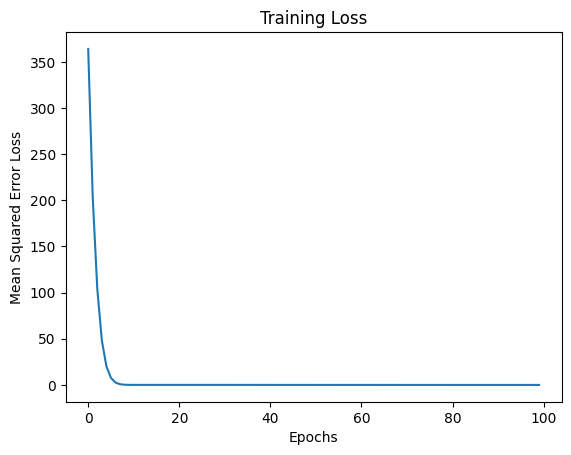

In [41]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training Loss')
plt.show()

 1/78 [..............................] - ETA: 2s

78/78 [==============================] - 0s 1ms/step


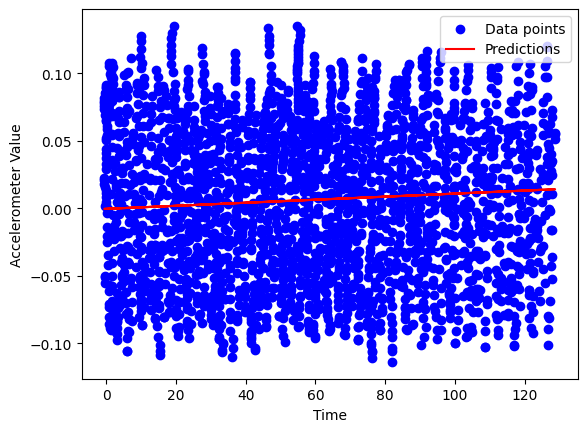

In [45]:
predictions = model.predict(X)


plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions, color='red', label='Predictions')
plt.xlabel('Time')
plt.ylabel('Accelerometer Value')
plt.legend()
plt.show()

In [46]:
# Calculate R-squared
r_squared = r2_score(y, predictions)
print("R-squared:", r_squared)

R-squared: -0.010483492866408817
